### Code for temp dependent measurements

In [2]:
import numpy as np
from scipy import constants as cs
from scipy.special import psi, kn, i0, k0, ellipk
import matplotlib.pyplot as plt
import res_analysis_CPW as resa
import os
import matplotlib.pyplot as plt
import h5py
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from itertools import islice
import scipy.interpolate as interpol
import math
import matplotlib.cm as cm
import matplotlib.colors as mcolors



tc = 1.2
gamma = -1/3

### Kinetic inductance

In [19]:
## finding geometric inductance
w= 20e-6
g= 9e-6
k = w/(w+ 2*g)
k_d = np.sqrt(1- k**2)
L_g = (cs.mu_0 * ellipk(k_d))/ (4* ellipk(k))
L_g

np.float64(3.999985527458239e-07)

In [20]:
L_g_n = L_g*1e9
L_g_n

np.float64(399.99855274582393)

In [ ]:
423.62920143184493

In [9]:
cs.mu_0

1.25663706127e-06

In [21]:
alpha_L_ki = np.divide(L, (L + L_g*w))
alpha_L_ki

np.float64(0.010844905109532788)

In [18]:
x = np.divide(0.086e-12, (0.086e-12 + 423.629e-09 * 10e-6))
x

np.float64(0.019896860229184063)

### Frequency shift data


In [7]:
freq_data_cpw = [[30,4.826524073,0.290812],
[50, 4.826524073, 0.291629],
[75, 4.826523825, 0.291612],
[100, 4.826523695, 0.292409],
[125, 4.826523655, 0.292644],
[150, 4.826523601, 0.293924],
[175, 4.826523391, 0.299193],
[200, 4.826522213, 0.317687]]

In [94]:
freq_data = [[0.018, 4.446573448, 0.100602] ,
            [0.05,4.446573444, 0.100893 ],
            [0.1, 4.446573099, 0.100512 ]]

In [8]:
temp_data = [item[0] for item in freq_data_cpw]
res_freq_data= [item[1] for item in freq_data_cpw]
fspan_data = [item[2] for item in freq_data_cpw]
f_0_data = freq_data_cpw[0]

In [245]:
7.113095262-7.113096502

-1.2400000004575418e-06

In [12]:
freq_data_cpw_1 =[[30,7.113095262,	0.693317],
[50,7.113097086,0.692557],
[75,7.113096794,0.692057],
[100, 7.113096651, 0.693450],
[125, 7.113096502,0.693343],
[150, 7.113096391, 0.694700],
[175, 7.113095993, 0.703637],
[200, 7.113094426, 0.735162]]

In [252]:
freq_data_cpw_1 =[
[50,7.113097086,0.692557],
[75,7.113096794,0.692057],
[100, 7.113096651, 0.693450],
[125, 7.113096502,0.693343],
[150, 7.113096391, 0.694700],
[175, 7.113095993, 0.703637],
[200, 7.113094426, 0.735162]]

In [96]:
freq_data_r2 = [[0.018, 4.606750109, 0.077319 ],
                [0.05, 4.606749972, 0.077357 ],
               [0.1, 4.606749720, 0.076976]]

In [13]:
temp_data_r2 = [row[0] for row in freq_data_cpw_1]
res_freq_data_r2 = [row[1] for row in freq_data_cpw_1]
fspan_data_r2 = [row[2] for row in freq_data_cpw_1]
f_0_r2 = freq_data_cpw_1[0]

In [22]:
# Differences: (first_list[i] - value)
delta_freq = [v - f_0_data[1]  for v in res_freq_data]  # diff vs column 2
delta_fspan = [v - f_0_data[2] for v in fspan_data]  # diff vs column 3
delta_freq_r2 = [ v - f_0_r2[1] for v in res_freq_data_r2]
delta_fspan_r2 = [v - f_0_r2[2] for v in fspan_data_r2] 
frac_delta_freq = np.divide(delta_freq, f_0_data[1])
frac_delta_freq_r2 = np.divide(delta_freq_r2, f_0_r2[1])

In [23]:
frac_delta_freq_r2

array([ 0.00000000e+00,  2.56428451e-07,  2.15377405e-07,  1.95273640e-07,
        1.74326359e-07,  1.58721338e-07,  1.02768201e-07, -1.17529707e-07])

In [24]:
np.multiply(frac_delta_freq, 1e6)

array([ 0.        ,  0.        , -0.05138273, -0.07831723, -0.08660477,
       -0.09779294, -0.14130252, -0.3853705 ])

### Frequency shift plots

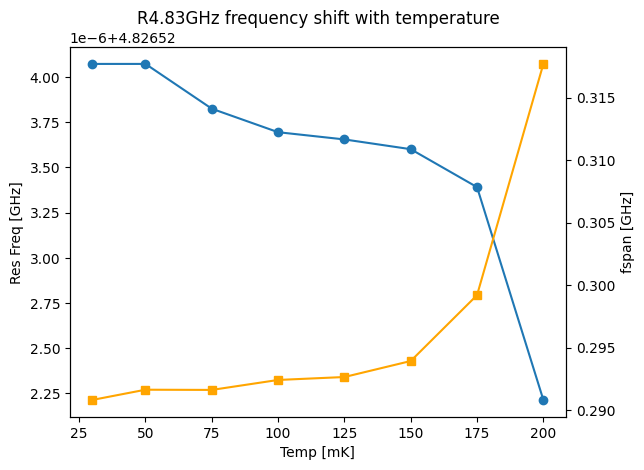

In [9]:
fig, ax_left = plt.subplots()

ax_left.plot(temp_data, res_freq_data, label="Temp", marker="o")
ax_left.set_xlabel("Temp [mK]")
ax_left.set_ylabel("Res Freq [GHz]")

# Create right axis
ax_right = ax_left.twinx()
ax_right.plot(temp_data, fspan_data, color="orange", label="fspan", marker="s")
ax_right.set_ylabel("fspan [GHz]")

plt.title("R4.83GHz frequency shift with temperature")
plt.show()

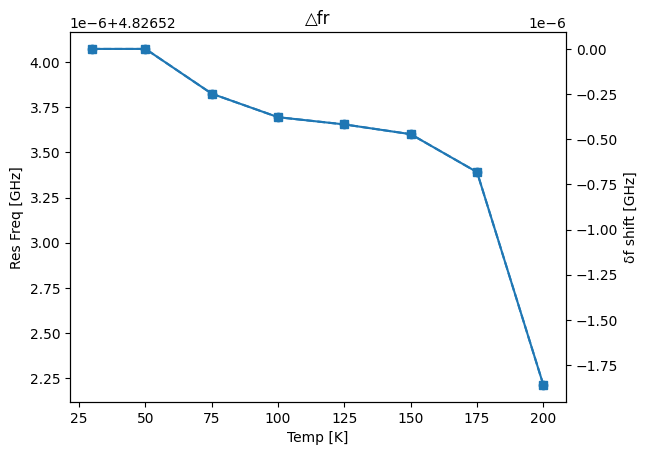

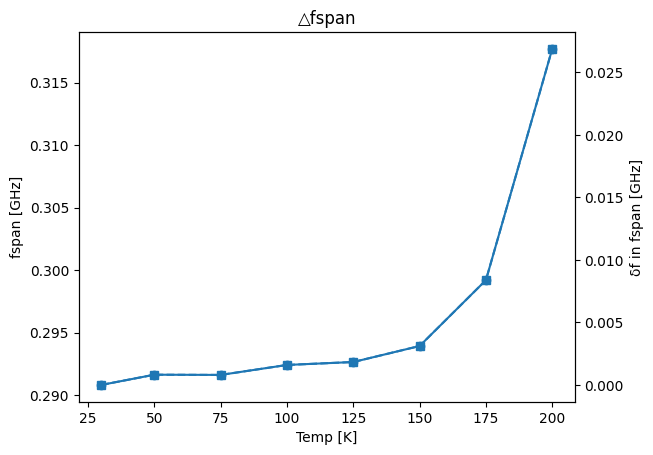

In [19]:
fig1, ax1 = plt.subplots()
ax1.plot(temp_data, res_freq_data, marker="o")
ax1.set_xlabel("Temp [K]")
ax1.set_ylabel("Res Freq [GHz]")

# Right-hand axis = difference
ax1_r = ax1.twinx()
ax1_r.plot(temp_data, delta_freq, marker="s", linestyle="--")
ax1_r.set_ylabel("δf shift [GHz]")
plt.title("△fr")
# ---- PLOT 2 (column 3) ----
fig2, ax2 = plt.subplots()
ax2.plot(temp_data, fspan_data, marker="o")
ax2.set_xlabel("Temp [K]")
ax2.set_ylabel("fspan [GHz]")

# Right-hand axis = difference
ax2_r = ax2.twinx()
ax2_r.plot(temp_data, delta_fspan, marker="s", linestyle="--")
ax2_r.set_ylabel("δf in fspan [GHz]")
plt.title("△fspan")
plt.show()

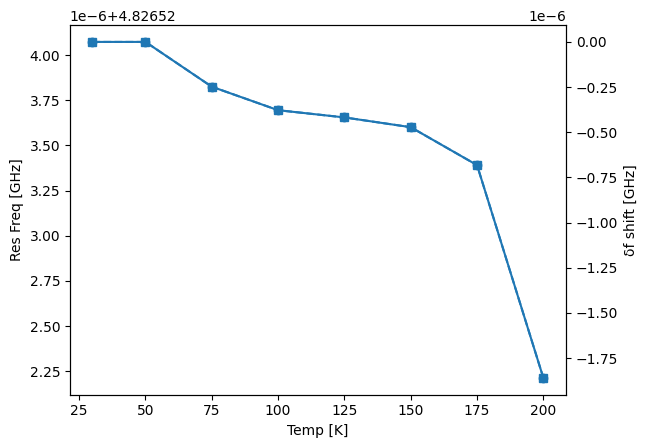

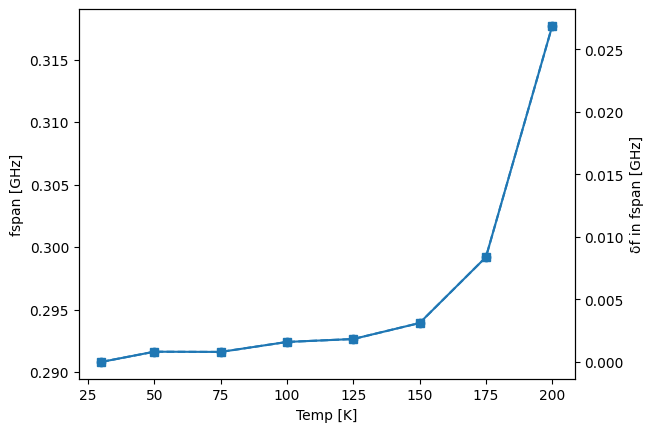

In [25]:
fig3, ax1 = plt.subplots()
ax1.plot(temp_data, res_freq_data, marker="o")
ax1.set_xlabel("Temp [K]")
ax1.set_ylabel("Res Freq [GHz]")

# Right-hand axis = difference
ax1_r = ax1.twinx()
ax1_r.plot(temp_data, delta_freq, marker="s", linestyle="--")
ax1_r.set_ylabel("δf shift [GHz]")
# ---- PLOT 2 (column 3) ----
fig4, ax2 = plt.subplots()
ax2.plot(temp_data, fspan_data, marker="o")
ax2.set_xlabel("Temp [K]")
ax2.set_ylabel("fspan [GHz]")

# Right-hand axis = difference
ax2_r = ax2.twinx()
ax2_r.plot(temp_data, delta_fspan, marker="s", linestyle="--")
ax2_r.set_ylabel("δf in fspan [GHz]")

plt.show()

In [26]:
frac_delta_freq_r2

array([ 0.00000000e+00,  2.56428451e-07,  2.15377405e-07,  1.95273640e-07,
        1.74326359e-07,  1.58721338e-07,  1.02768201e-07, -1.17529707e-07])

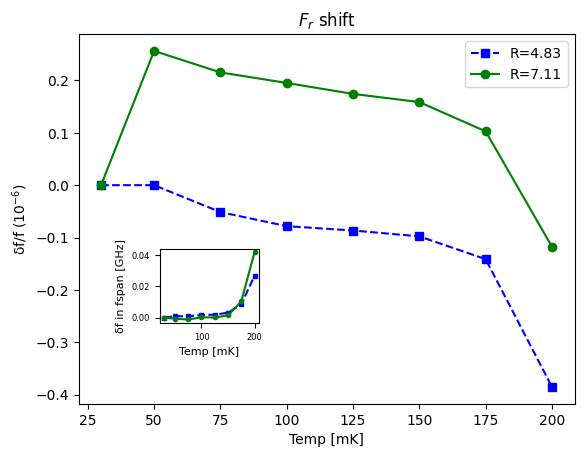

In [28]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots()

# Plot both diff series on the SAME axis
ax.plot(temp_data, np.multiply(frac_delta_freq, 1e6) , marker='s', linestyle='--', color='b', label="R=4.83")
ax.plot(temp_data_r2, np.multiply(frac_delta_freq_r2, 1e6), marker='o', linestyle='-', color='g', label="R=7.11")

# Labels
ax.set_xlabel("Temp [mK]")
ax.set_ylabel(r"δf/f ($10^{-6}$)")

# Legend
ax.legend()
plt.title("$F_{r}$ shift")
inset_ax = inset_axes(ax, width="20%", height="20%", loc="lower left", bbox_to_anchor=(0.15, 0.2, 1, 1),  # <--- shift upward
    bbox_transform=ax.transAxes)

# Plot inside inset
inset_ax.plot(temp_data, delta_fspan,marker='s', linestyle='--', color="b", ms=3)
inset_ax.plot(temp_data, delta_fspan_r2, marker ='o', color="g", ms=3)
inset_ax.set_xlabel("Temp [mK]", fontsize=8)
inset_ax.set_ylabel("δf in fspan [GHz]", fontsize=8)
inset_ax.tick_params(labelsize=6)



plt.show()

### N_qp(T_qp)

In [2]:
t_c = 1.26
N_0= 1.72e10 / ((1.6e-19)*(1e-18))
tau_0= 110e-9
k_b= cs.k
#8.617333262e-5   
scg= 1.76* k_b * t_c


In [54]:
t_c = 1.26
N_0= 1.72e10 
tau_0= 110e-9
k_b= 8.617333262e-5   
scg= 1.76* k_b * t_c


In [43]:
t= 0.018
t_r = (tau_0/ np.sqrt(cs.pi)) * ( np.sqrt(t_c/ t)) * np.exp(scg / (k_b*t))
t_r

np.float64(1.6612956936095688e+47)

In [44]:
t/t_r

np.float64(1.0834916426521652e-49)

In [58]:
N_0

17200000000.0

In [52]:
def gamma_R():
    gamma_r = 2*((scg/(k_b*t_c))**3) * (1/ (N_0 * scg * tau_0))
    return gamma_r 
    ## returns gamma in m^3/s they give it in μm^3/s

In [4]:
gamma_R() *1e18 #gamma as they have it

30.116212584966267

In [118]:
n_qp_T(0.018, kb, N0)

np.float64(0.0018790828271880635)

In [8]:
def n_qp_t_qp(tb, kb, N0, I_ext, gamma_s, gamma_r ):
    brackets = n_qp_t(tb, kb, N0) + (gamma_s / (2*gamma_r))
    sqrt = I_ext / gamma_r + brackets**2
    return np.sqrt(sqrt) - gamma_s/ (2*gamma_r)

In [213]:
n_qp_T(0.018, cs.k,  1.72e10 / (1.6e-19))

np.float64(4.756305110837213e+59)

In [224]:
delta_T(t)

np.float64(3.0617272224e-23)

In [35]:
def n_qp_T(t, kb, N0):
    sqrtt= 2*cs.pi*kb*t*delta_T(t)
    expo = delta_T(t) / (kb*t)
    return 2* N0 * np.sqrt(sqrtt) * np.exp(-expo)

In [47]:
def gamma_S(I_ext, gamma_r, t_min= 0.02, kb=cs.k, N0=1.72e10  ):
    num = I_ext - gamma_r * n_qp_T(t_min, kb, N0)**2
    return num / n_qp_T(t_min, kb, N0)

In [42]:
gamma_s(10**8 , 30, 0.2, cs.k,  1.72e10 /(1.6e-19))

np.float64(1317003.0302477633)

In [58]:
def scg_approx(t):
    return scg* np.exp(-(np.sqrt((2*cs.pi*k_b*t)/scg))* np.exp(- scg/(k_b *t)))

In [56]:
def n_qp(t_star):
    return 2 * N_0 * np.sqrt(2 * cs.pi * k_b * t_star * scg_approx(t_star))* np.exp(-scg_approx(t_star)/ (k_b * t_star))

In [57]:
def n_qp_rates(t_bath, I_ext):
    nqp =np.sqrt((I_ext/ gamma_R()) + (n_qp(t_bath) + (gamma_S(0.02, I_ext)/ 2* gamma_R()))**2) - (gamma_S(0.02, I_ext)/ 2* gamma_R())
    return nqp

In [29]:
import numpy as np
import matplotlib.pyplot as plt


# Values for a and b
temp = np.linspace(0.005, 0.02, 50)
I_ext= np.logspace(0, 25, 26)   # 10^0 to 10^25

# Make a grid of all (a, b) combinations
A, B = np.meshgrid(temp, I_ext)

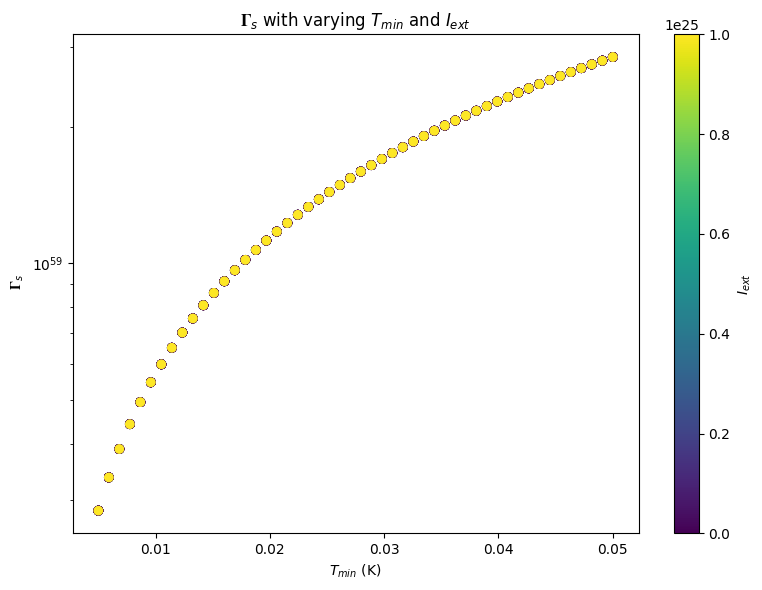

In [48]:
# Values for a and b
t_min = np.linspace(0.005, 0.05, 50)
I_ext= np.logspace(0, 25, 26)   # 10^0 to 10^25

# Make a grid of all (a, b) combinations
c,d = np.meshgrid(t_min, I_ext)
y = gamma_S(c, d)

# Flatten for scatter plotting
c_flat = c.flatten()
d_flat = d.flatten()
y_flat = y.flatten()

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(c_flat, y_flat, c=d_flat)
plt.xlabel("$T_{min}$ (K)")
plt.ylabel(" $𝚪_{s}$")
plt.yscale("log")
plt.title("$𝚪_{s}$ with varying $T_{min}$ and $I_{ext}$")
plt.colorbar(scatter, label="$I_{ext}$")
plt.tight_layout()
plt.show()

In [ ]:


# Compute function output at each point
Z = n_qp_rates(A, B)

# Flatten for scatter plotting
a_flat = A.flatten()
b_flat = B.flatten()
z_flat = Z.flatten()

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(a_flat, z_flat, c=b_flat)
plt.xlabel("$T_{b}$ (K)")
plt.ylabel(" $n_{qp}$")
plt.yscale("log")
plt.title("$n_{qp}$ with varying $T_{b}$ and $I_{ext}$")
plt.colorbar(scatter, label="$I_{ext}$")
plt.tight_layout()
plt.show()


In [60]:
import numpy as np

k_B = 8.617333262e-5      # eV/K
alpha = 1.76
Tc = 1.26                 # K
N0 = 1.72e10              # 1/(µm^3 eV)
T_star = 0.02           # K (20 mK)

Delta0 = alpha * k_B * Tc

Delta_T = Delta0 * np.exp(
    -np.sqrt(2*np.pi*k_B*T_star / Delta0) *
      np.exp(-Delta0 / (k_B*T_star))
)

n_qp = 2 * N0 * np.sqrt(2*np.pi*k_B*T_star*Delta_T) * \
       np.exp(-Delta_T / (k_B*T_star))

print(n_qp)
# → 1.096e-42  (µm^-3)


1.096240181319906e-42


In [61]:
n_qp* 1e18 * 1e9

np.float64(1.0962401813199061e-15)

## modelling eqn

In [62]:
import numpy as np

def Qi_inverse(omega_r, T_b, n, Q_A, Q_TLS0, hbar, k_B, beta_i, D_i, beta_ii,
               gamma, alpha_Lki):
    """
    Compute 1/Q_i(ω_r, T_b, n)

    Parameters
    ----------
    omega_r : float
        Resonant angular frequency ω_r
    T_b : float
        Bath temperature T_b
    n : float
        Photon number n
    Q_A : float
        Background quality factor Q_A
    Q_TLS0 : float
        Zero-temperature TLS quality factor Q_TLS^0
    hbar : float
        Reduced Planck's constant
    k_B : float
        Boltzmann constant
    beta_i : float
        TLS saturation parameter β_i
    D_i : float
        Some material parameter D_i
    T_b_i : float
        TLS-related temperature T_b^i
    gamma, alpha_Lki : float
        Loss coefficients
    sigma1(ω,T_qp), sigma2(ω,0) must be passed as values
    """

    # tanh terms
    tanh_term = np.tanh(hbar * omega_r / (2 * k_B * T_b))

    # TLS saturation factor
    #beta 1 ~ 1
    #beta 2 ~ 0.5
    saturation = np.sqrt(1 + ((n ** beta_i) / (D_i * (T_b)** beta_ii)) * tanh_term)
    
    # TLS contribution
    TLS_contribution = (1 / Q_TLS0) * (tanh_term / saturation)

    # Quasiparticle loss term
    qp_term = gamma * alpha_Lki * (sigma1_ratio(omega_r, T_b, hbar, k_B) / sigma2_ratio(omega_r, T_b, hbar, k_B))

    # Final expression
    Qi_inv = 1/Q_A + TLS_contribution - qp_term
    #Qi_inv = TLS_contribution - qp_term

    return Qi_inv, TLS_contribution, qp_term


In [63]:
import numpy as np

def Qi_inverse_v2(omega_r, T_b, T_eff, n, Q_A, Q_TLS0, hbar, k_B, beta_i, D_i, beta_ii,
               gamma, alpha_Lki):
    """
    Compute 1/Q_i(ω_r, T_b, n)

    Parameters
    ----------
    omega_r : float
        Resonant angular frequency ω_r
    T_b : float
        Bath temperature T_b
    n : float
        Photon number n
    Q_A : float
        Background quality factor Q_A
    Q_TLS0 : float
        Zero-temperature TLS quality factor Q_TLS^0
    hbar : float
        Reduced Planck's constant
    k_B : float
        Boltzmann constant
    beta_i : float
        TLS saturation parameter β_i
    D_i : float
        Some material parameter D_i
    T_b_i : float
        TLS-related temperature T_b^i
    gamma, alpha_Lki : float
        Loss coefficients
    sigma1(ω,T_qp), sigma2(ω,0) must be passed as values
    """

    # tanh terms
    tanh_term = np.tanh(hbar * omega_r / (2 * k_B * T_b))

    # TLS saturation factor
    #beta 1 ~ 1
    #beta 2 ~ 0.5
    saturation = np.sqrt(1 + ((n ** beta_i) / (D_i * (T_b)** beta_ii)) * tanh_term)
    
    # TLS contribution
    TLS_contribution = (1 / Q_TLS0) * (tanh_term / saturation)

    # Quasiparticle loss term
    qp_term = gamma * alpha_Lki * (sigma1_ratio(omega_r, T_eff, hbar, k_B) / sigma2_ratio(omega_r, 0.0018, hbar, k_B))

    # Final expression
    Qi_inv = 1/Q_A + TLS_contribution - qp_term
    #Qi_inv = TLS_contribution - qp_term

    return Qi_inv, TLS_contribution, qp_term


In [64]:
import numpy as np
from scipy.special import k0, i0  # Modified Bessel functions

def sigma1_ratio(omega, T_star, hbar, k_B):
    """
    Computes σ1(ω, T*) / σ_n
    Equation (11)
    """
    x = hbar * omega / (2 * k_B * T_star)
    
    return (4 * delta_T(T_star) / (hbar * omega)
            * np.exp(-delta_T(T_star) / (k_B * T_star))
            * np.sinh(x)
            * k0(x))


def sigma2_ratio(omega, T_star, hbar, k_B):
    """
    Computes σ2(ω, T*) / σ_n
    Based on the second equation provided
    """
    x = hbar * omega / (2 * k_B * T_star)
    
    term1 = 1 - np.sqrt((2 * np.pi * k_B * T_star) / delta_T(T_star)) \
              * np.exp(-delta_T(T_star) / (k_B * T_star))
    
    term2 = 2 * np.exp(-(2 * delta_T(T_star) + hbar * omega) / (2 * k_B * T_star)) \
              * i0(x)
    
    return (np.pi * delta_T(T_star) / (hbar * omega)) * (term1 - term2)


In [65]:
import numpy as np

def delta_T(T_star, T_c = 1.26, k_B=1.380649e-23):
    """
    Compute Δ(T*) using
    Δ(T*) ≈ Δ(0) * exp[- sqrt( (2π k_B T* / Δ(0)) * exp(-Δ(0)/(k_B T*)) )]
    with Δ(0) = 1.76 k_B T_c

    Parameters
    ----------
    T_star : float or ndarray
        Effective temperature T*  [K]
    T_c : float
        Critical temperature T_c  [K]
    k_B : float, optional
        Boltzmann constant (default: SI value)

    Returns
    -------
    delta_Tstar : float or ndarray
        Δ(T*) in Joules
    """
    # Zero-temperature gap
    delta0 = 1.76 * k_B * T_c

    # Argument inside the square root
    sqrt = (2 * np.pi * k_B * T_star / delta0) 
    expo = np.exp(-delta0 / (k_B * T_star))
    inner = sqrt * expo

    # Full expression
    delta_Tstar = delta0 * np.exp(-np.sqrt(sqrt) * expo)
    #delta_Tstar = delta0 * np.exp(-np.sqrt(inner))
    

    return delta_Tstar


In [66]:
beta_i =[ 1.3, 1, 0.95, 0.9, 0.85, 0.7, 0.6]
D = [25, 15, 13, 10, 10, 5, 2]
n = np.logspace(0, 6, 7)


1.0
10.0
100.0
1000.0
10000.0
100000.0
1000000.0


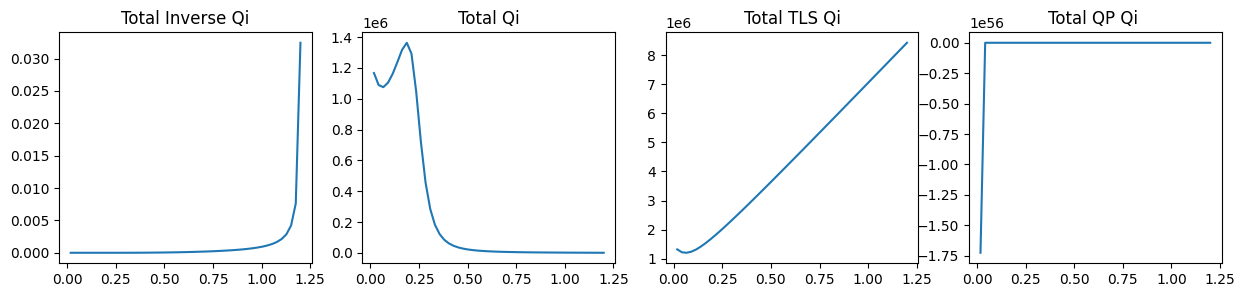

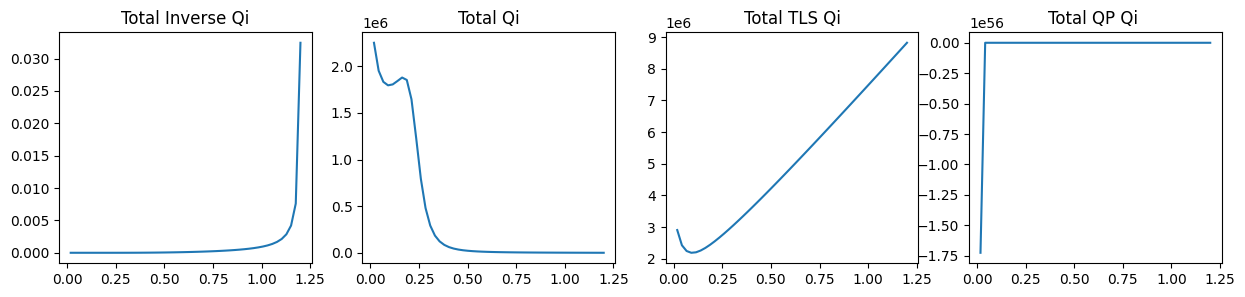

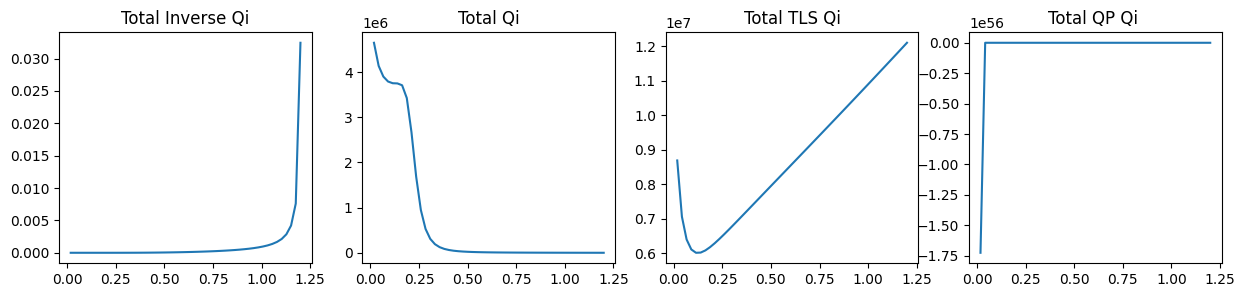

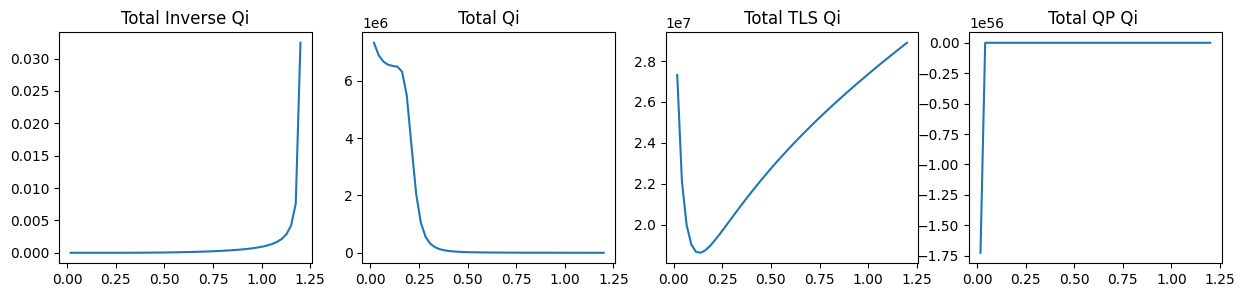

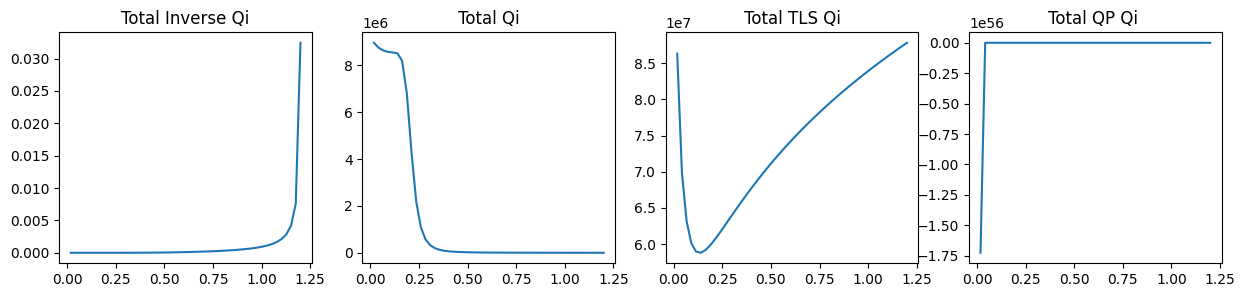

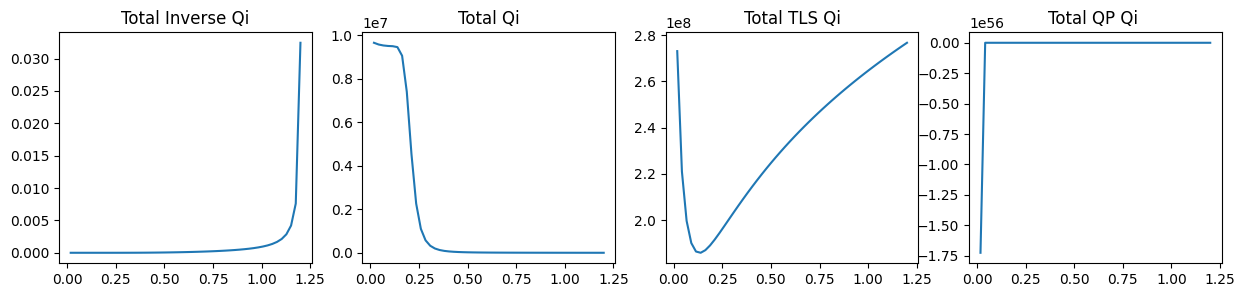

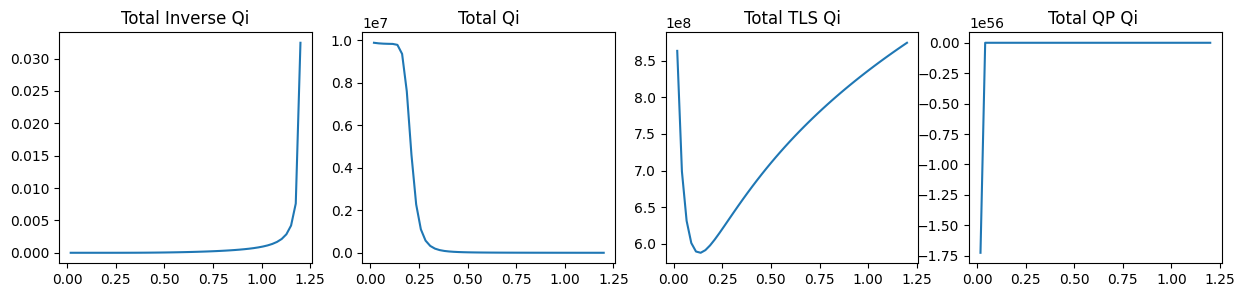

In [67]:
#beta_i
#beta_i = np.linspace(1.3, 0.7, 7)

temp_values = np.linspace(0.018,1.2, 50)
n = np.logspace(0, 6, 7)

for k in n:
        qi_for_specific_power = []
        total_inv_q = []
        total_qi = []
        total_qi_tls = []
        total_qi_qp = []
        for t in temp_values:
            Qi_inv, TLS_contribution, qp_term = Qi_inverse(omega_r = 2*np.pi*6e9, T_b = t, n= k, Q_A= 10e6, Q_TLS0 =10e5, hbar =cs.hbar, k_B = cs.k, beta_i= 1 , D_i=10, beta_ii = 0.5,
                   gamma= -1/3, alpha_Lki=0.02)
            Qi = 1/ Qi_inv
            TLS_contribution= 1/ TLS_contribution
            qp_term = 1/ qp_term
            total_inv_q.append(Qi_inv)
            total_qi.append(Qi)
            total_qi_tls.append(TLS_contribution)
            total_qi_qp.append(qp_term)
            #print(f" Power : {n[i]} with result : {Qi_inv}")
        print(k)
        fig, ax = plt.subplots(1, 4, figsize=(15, 3)) # figsize controls the total size of the figure
        
        ax[0].plot(temp_values, total_inv_q)
        #ax[0].set_xscale("log")
        #ax[0].set_yscale("log")
        ax[0].set_title('Total Inverse Qi')
        
        
        ax[1].plot(temp_values, total_qi)
        #ax[1].set_xscale("log")
        #ax[1].set_yscale("log")
        ax[1].set_title('Total Qi')
        
        ax[2].plot(temp_values, total_qi_tls)
        #ax[2].set_xscale("log")
        #ax[2].set_yscale("log")
        ax[2].set_title('Total TLS Qi')
        
        ax[3].plot(temp_values, total_qi_qp)
        #ax[3].set_xscale("log")
        #ax[3].set_yscale("log")
        ax[3].set_title('Total QP Qi ')


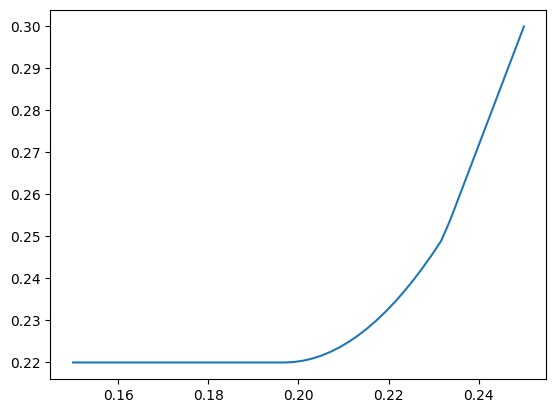

In [68]:
temp_values = np.linspace(0.018,0.3, 50)
n = np.logspace(0, 6, 7)
T_s = []

for i in temp_values:
    if i < 0.15:
        T_s.append(0.22)
    if 0.15< i < 0.25:
        y = 0.22 + 3*(i - 0.15)**2
        T_s.append(y)
    if i>= 0.25:
        T_s.append(i)

plt.figure() 
x= np.linspace(0.15, 0.25)
#y = 0.22 + 3*(x - 0.15)**2
plt.plot(x, T_s)


1.0
10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0


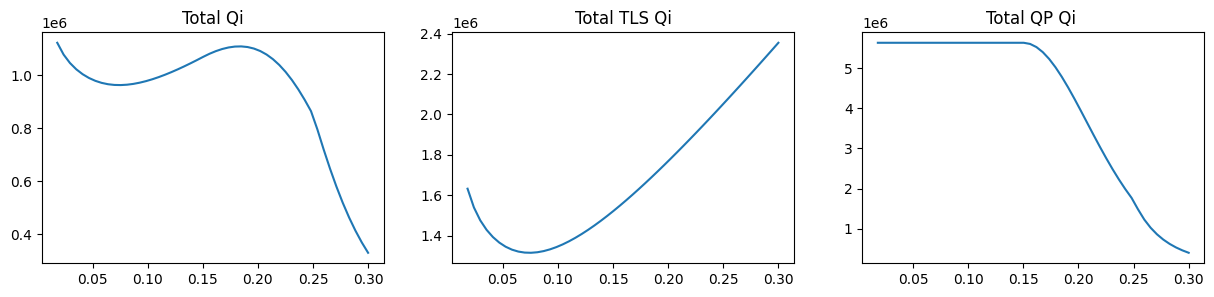

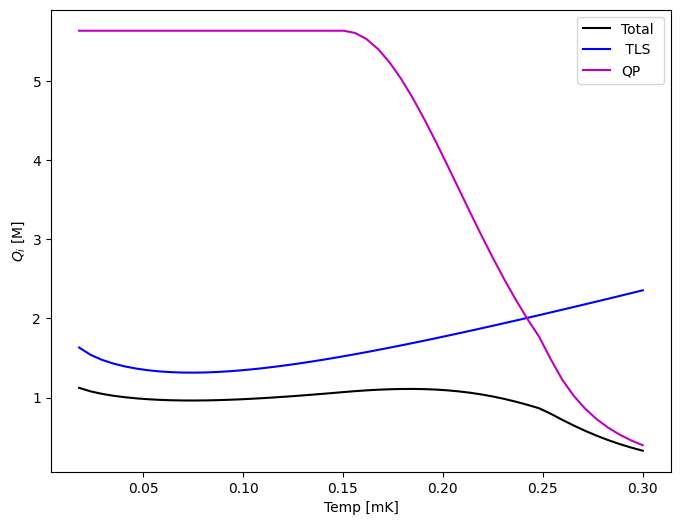

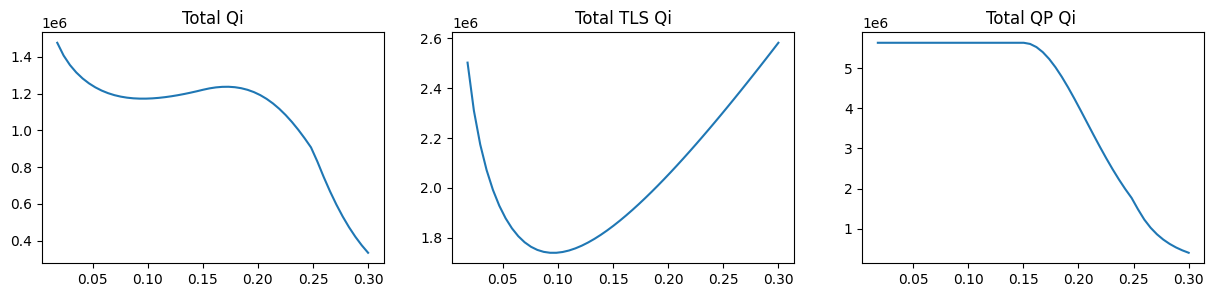

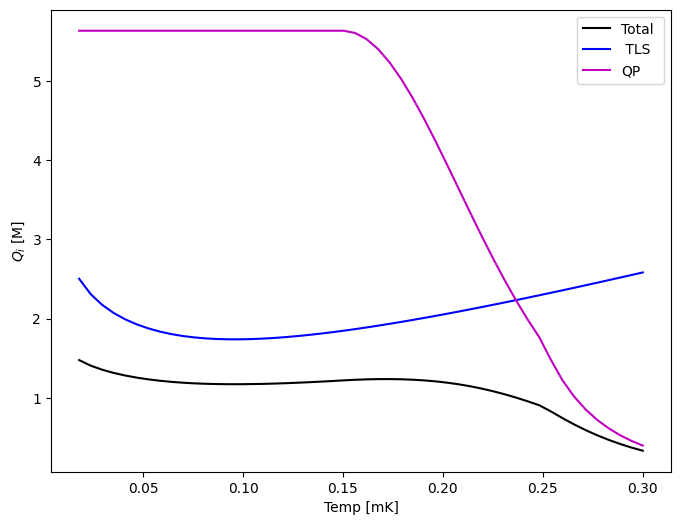

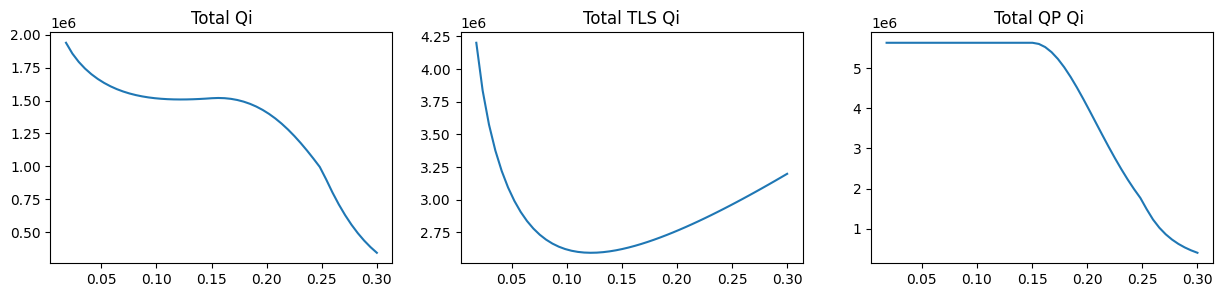

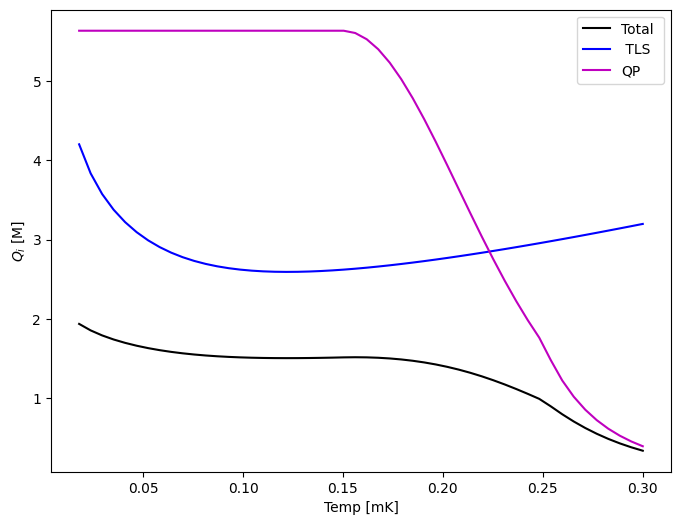

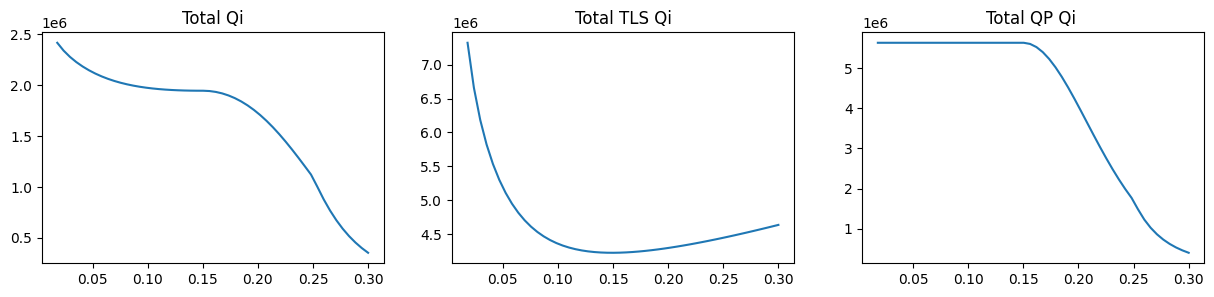

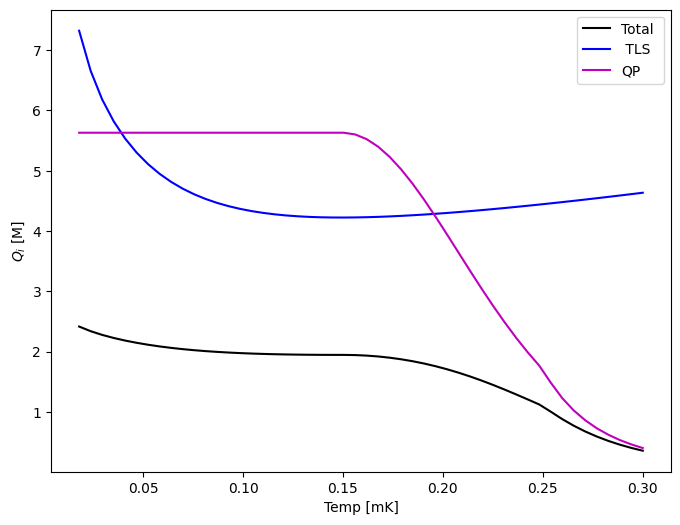

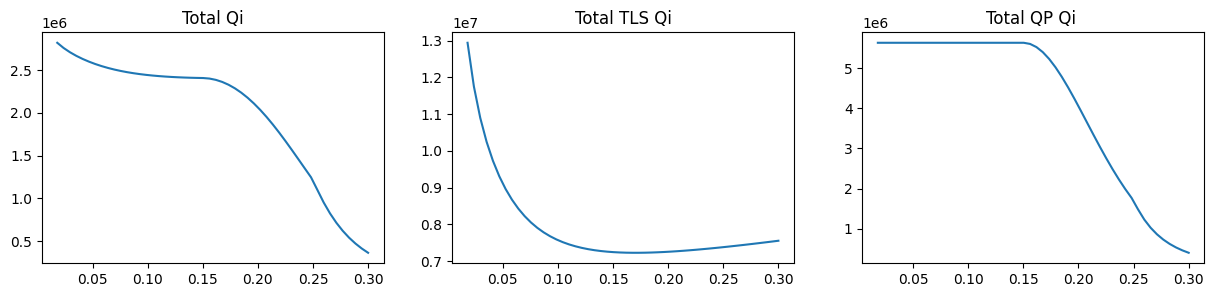

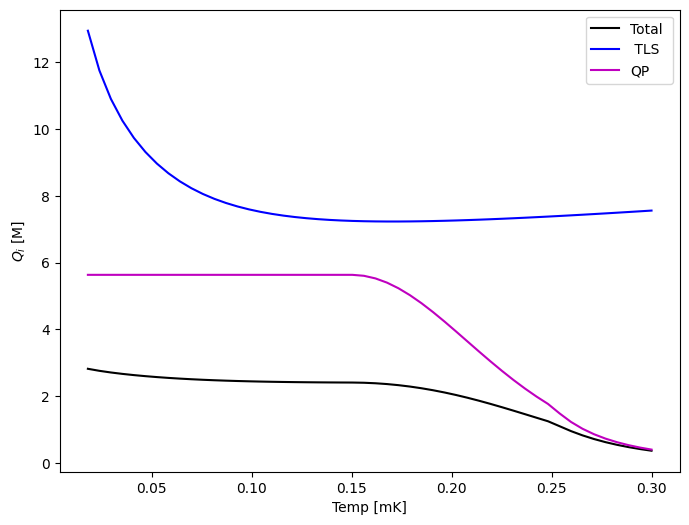

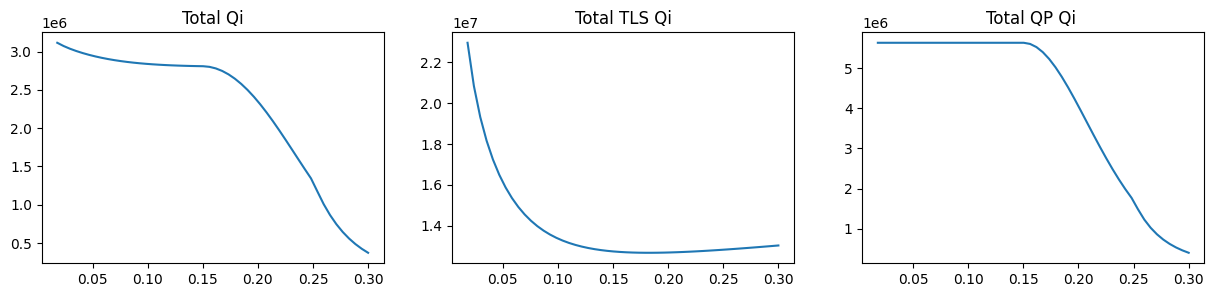

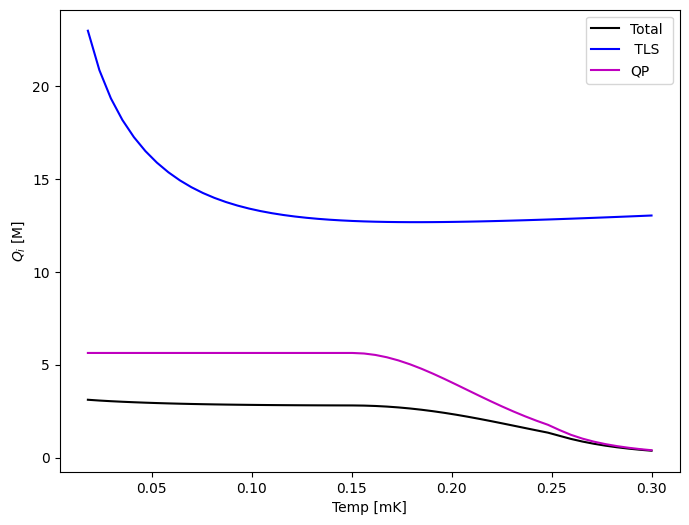

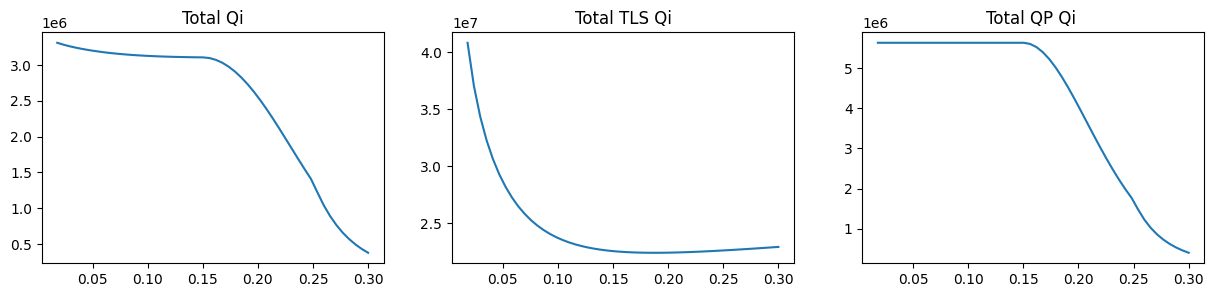

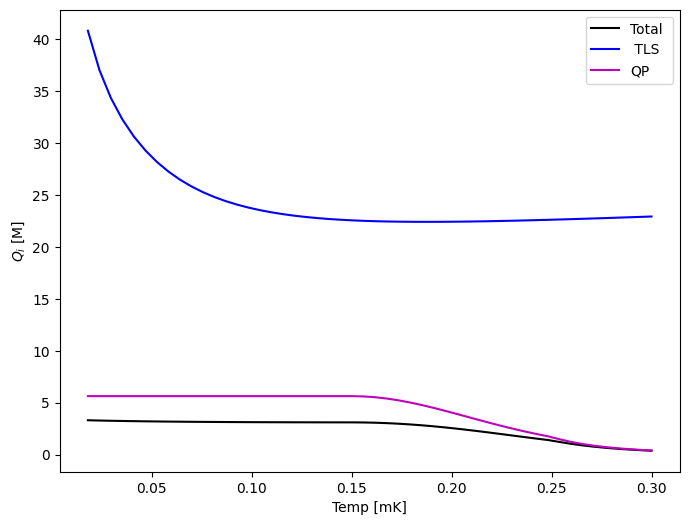

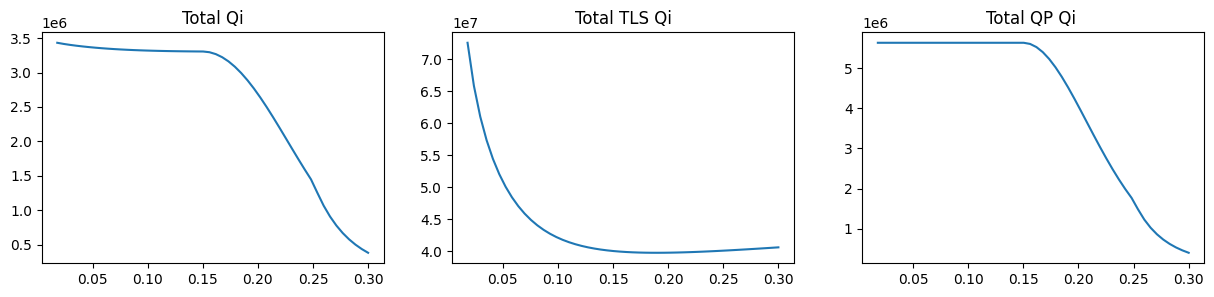

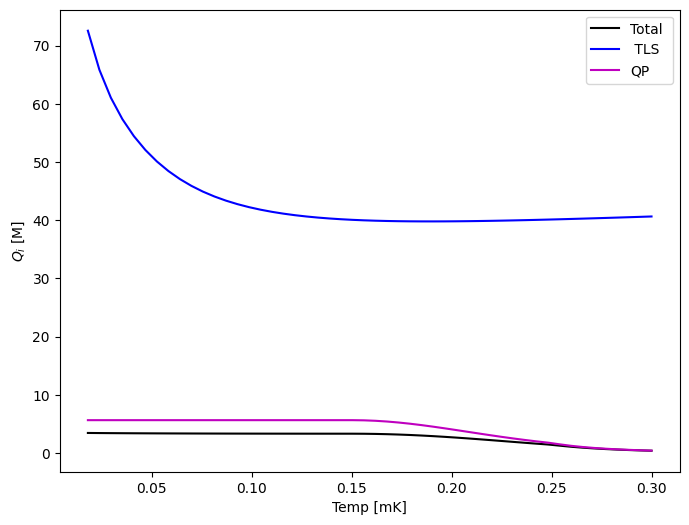

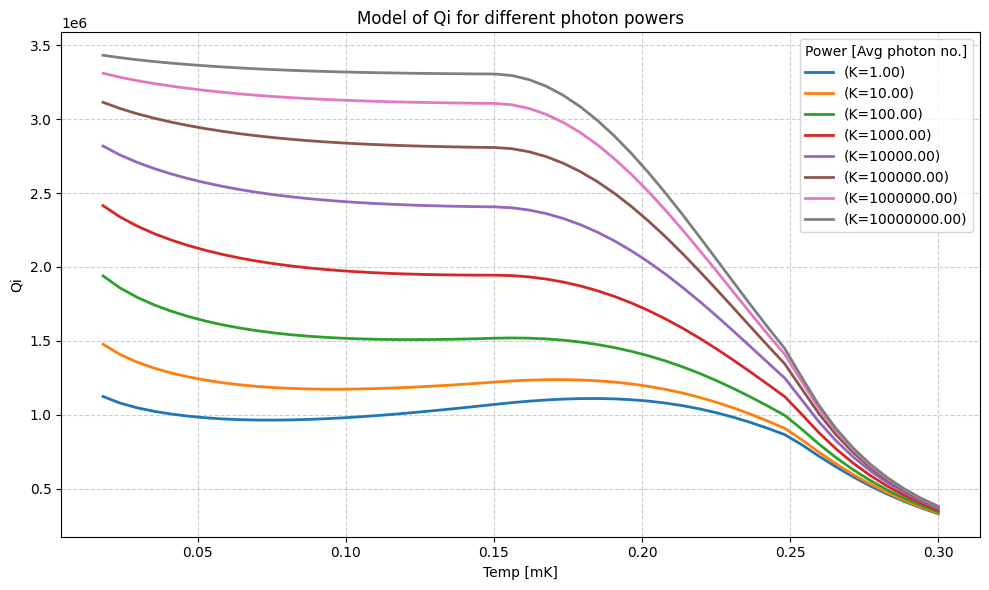

In [69]:

temp_values = np.linspace(0.018,0.3, 50)
n = np.logspace(0, 7, 8)
T_s = []

for i in temp_values:
    if i < 0.15:
        T_s.append(0.22)
    if 0.15< i < 0.25:
        y = 0.22 + 3*(i - 0.15)**2
        T_s.append(y)
    if i>= 0.25:
        T_s.append(i)

all_total_qi = []
all_total_qi_tls = []
all_total_qi_qp = []
all_qp_terms_for_plotting = []
for k in n:
        qi_for_specific_power = []
        total_inv_q = []
        total_qi = []
        total_qi_tls = []
        total_qi_qp = []
        total_qi_qp_term_plotting = []
        for i in range(len(temp_values)):
            Qi_inv, TLS_contribution, qp_term = Qi_inverse_v2(omega_r = 2*np.pi*6e9, T_b = temp_values[i], T_eff=T_s[i], n= k, Q_A= 10e6, Q_TLS0 =10e5, hbar =cs.hbar, k_B = cs.k, beta_i=0.5 , D_i=10, beta_ii = 0.7,
                   gamma= -1/3, alpha_Lki=0.02)
            Qi = 1/ Qi_inv
            TLS_contribution= 1/ TLS_contribution
            qp_term = qp_term
            qp_term_for_plotting = -qp_term
            total_inv_q.append(Qi_inv)
            total_qi.append(Qi)
            total_qi_tls.append(TLS_contribution)
            total_qi_qp.append(qp_term)
            total_qi_qp_term_plotting.append(1/qp_term_for_plotting)
            #print(f" Power : {n[i]} with result : {Qi_inv}")
        all_total_qi.append(total_qi)
        all_total_qi_tls.append(total_qi_tls)
        all_total_qi_qp.append(total_qi_qp)
        all_qp_terms_for_plotting.append(qp_term_for_plotting)
        fig, ax = plt.subplots(1, 3, figsize=(15, 3)) # figsize controls the total size of the figure
        
        ax[0].plot(temp_values, total_qi)
        #ax[1].set_xscale("log")
        #ax[1].set_yscale("log")
        ax[0].set_title('Total Qi')
        
        ax[1].plot(temp_values, total_qi_tls)
        #ax[2].set_xscale("log")
        #ax[2].set_yscale("log")
        ax[1].set_title('Total TLS Qi')
        
        ax[2].plot(temp_values, total_qi_qp_term_plotting)
        #ax[3].set_xscale("log")
        #ax[3].set_yscale("log")
        ax[2].set_title('Total QP Qi ')
        print(k)

        plt.figure(figsize=(8, 6))
        plt.plot(temp_values, np.divide(total_qi,1e6), c= 'k', label = 'Total ')
        plt.plot(temp_values, np.divide(total_qi_tls, 1e6), c= 'b', label = ' TLS ')
        plt.plot(temp_values, np.divide(total_qi_qp_term_plotting, 1e6), c= 'm', label = 'QP')
        plt.xlabel("Temp [mK]")
        plt.ylabel("$Q_i$ [M]")
        plt.legend()
fig, ax = plt.subplots(figsize=(10,6))
for i, total_qi in enumerate(all_total_qi):
    k_value = n[i]
    ax.plot(temp_values, total_qi, 
            label=f'(K={k_value:.2f})', 
            linewidth=2, 
            linestyle='-')

# --- Add Labels and Legend ---
ax.set_xlabel('Temp [mK]')
ax.set_ylabel('Qi')
ax.set_title('Model of Qi for different photon powers')
ax.legend(title='Power [Avg photon no.]')
ax.grid(True, which="both", ls="--", alpha=0.6)

plt.tight_layout()
plt.show()

## n qp w T eff

In [70]:
n_qp_T(0.2, cs.k, N0)

np.float64(1.2127854850214307e-17)

In [72]:
###parameters
N0 = 1.72e10
#kb = 8.617 * 10e-5
kb = cs.k
I_ext = 10**5
gamma_r = 28


In [74]:
t_c = 1.26
N_0= 1.72e10 / (1.6e-19)
tau_0= 110e-9
k_b= cs.k
#8.617333262e-5   
scg= 1.76* k_b * t_c

In [76]:
gamma_s(10**6, 28, 0.2, cs.k, N0)

np.float64(8.245481268951114e+22)

## Processing losses

In [77]:
import os
import re

def natural_key(s):
    return [int(t) if t.isdigit() else t.lower()
            for t in re.split(r'(\d+)', s)]

data = {}
folder_path = r'G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data'

files = sorted(os.listdir(folder_path), key=natural_key)

for filename in files:
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path): 
        with open(file_path, 'r') as f:
            try: 
                print(f'Processing: {file_path}')
                res_index, powers, fr, Qi, Qc, av_n, fr_err, Qi_err, Qc_err, R2, p_surf, p_MA, p_SA, p_MS = resa.read_data_from_hdf5_file(file_path)
                name_only = os.path.splitext(filename)[0] 
                temperature = int(name_only.split("_")[-1].replace("mK", ""))
                data[filename] = {
                    'res_index': res_index,
                    'powers': powers,
                    'fr': fr,
                    'Qi' : Qi,
                    'Qc' : Qc,
                    'av_n' : av_n,
                    'fr_err' : fr_err, 
                    'Qi_err' : Qi_err,
                    'Qc_err' : Qc_err,
                    'R2' : R2, 
                    'temperature' : temperature,
                    
                }
            except Exception as e:
                print(f' Error processing {file_path} : e')

data_for_Qi_graph = [data[fname]['Qi'] for fname in data]
data_for_fr = [np.mean(data[fname]['fr'],axis=1) for fname in data]
data_for_av_n = [data[fname]['av_n'] for fname in data]
#data_for_p_surf = [data[fname]['p_surf'] for fname in data]
data_for_qc_graph = [np.mean(data[fname]['Qc'],axis=1)  for fname in data]
labels = [key[:7] for key in data.keys()]
data_for_temperature= [data[fname]['temperature'] for fname in data]
data_for_powers = [data[fname]['powers'] for fname in data]


Processing: G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_30mK.hdf5
Processing: G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_50mK.hdf5
Processing: G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_75mK.hdf5
Processing: G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_100mK.hdf5
Processing: G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_125mK.hdf5
Processing: G:\Shared drives\MSDE

### Combining y data 

In [404]:
###Combining y data 
y= []
for i in range(len(data_for_temperature)):
    y_data = data_for_Qi_graph[i][0][0]
    y.append(y_data)
for i in range(len(data_for_temperature), len(x)):
    k = i- int(len(data_for_temperature))
    y_data= frac_delta_freq[k]
    y.append(y_data)

## creating def for equations merged

### Equations for Qi and Df/f

In [6]:
import numpy as np

def delta_T(T_star, T_c = 1.26, k_B=1.380649e-23):
    """
    Compute Δ(T*) using
    Δ(T*) ≈ Δ(0) * exp[- sqrt( (2π k_B T* / Δ(0)) * exp(-Δ(0)/(k_B T*)) )]
    with Δ(0) = 1.76 k_B T_c

    Parameters
    ----------
    T_star : float or ndarray
        Effective temperature T*  [K]
    T_c : float
        Critical temperature T_c  [K]
    k_B : float, optional
        Boltzmann constant (default: SI value)

    Returns
    -------
    delta_Tstar : float or ndarray
        Δ(T*) in Joules
    """
    # Zero-temperature gap
    delta0 = 1.76 * k_B * T_c

    # Argument inside the square root
    sqrt = (2 * np.pi * k_B * T_star / delta0) 
    expo = np.exp(-delta0 / (k_B * T_star))
    inner = sqrt * expo

    # Full expression
    delta_Tstar = delta0 * np.exp(-np.sqrt(sqrt) * expo)
    #delta_Tstar = delta0 * np.exp(-np.sqrt(inner))
    

    return delta_Tstar

In [7]:
import numpy as np
from scipy.special import k0, i0  # Modified Bessel functions

def sigma1_ratio(omega, T_star, hbar, k_B):
    """
    Computes σ1(ω, T*) / σ_n
    Equation (11)
    """
    x = hbar * omega / (2 * k_B * T_star)
    
    return (4 * delta_T(T_star) / (hbar * omega)
            * np.exp(-delta_T(T_star) / (k_B * T_star))
            * np.sinh(x)
            * k0(x))


def sigma2_ratio(omega, T_star, hbar, k_B):
    """
    Computes σ2(ω, T*) / σ_n
    Based on the second equation provided
    """
    x = hbar * omega / (2 * k_B * T_star)
    
    term1 = 1 - np.sqrt((2 * np.pi * k_B * T_star) / delta_T(T_star)) \
              * np.exp(-delta_T(T_star) / (k_B * T_star))
    
    term2 = 2 * np.exp(-(2 * delta_T(T_star) + hbar * omega) / (2 * k_B * T_star)) \
              * i0(x)
    
    return (np.pi * delta_T(T_star) / (hbar * omega)) * (term1 - term2)

In [8]:
def QP_effT(T_b):
    if T_b < 0.15:
        return 0.22
    if 0.15<= T_b < 0.25:
        return 0.22 + 3*(T_b - 0.15)**2
    if i>= 0.25:
        return T_b

In [428]:
import numpy as np

def Qi_inverse_prcoessing(A, B, n, omega_r, T_b, hbar= cs.hbar, k_B=cs.k, beta_i=1, D_i=10, beta_ii= 0.5
               ):
    
    T_eff_result = QP_effT(T_b)
    # tanh terms
    tanh_term = np.tanh(hbar * omega_r / (2 * k_B * T_b))

    # TLS saturation factor
    #beta 1 ~ 1
    #beta 2 ~ 0.5
    saturation = np.sqrt(1 + ((n ** beta_i) / (D_i * (T_b)** beta_ii)) * tanh_term)
    
    # TLS contribution
    TLS_contribution = (1 / A) * (tanh_term / saturation)

    # Quasiparticle loss term
    qp_term = B * (sigma1_ratio(omega_r, T_eff_result, hbar, k_B) / sigma2_ratio(omega_r, 0.0018, hbar, k_B))

    # Final expression
    Qi_inv =  TLS_contribution - qp_term
    #Qi_inv = TLS_contribution - qp_term

    return Qi_inv


In [500]:
Qi_inverse_prcoessing(A=10**-7, B=10**-10, n=10**4, omega_r=4.5e09, T_b=0.03, hbar= cs.hbar, k_B=cs.k, beta_i=1, D_i=10, beta_ii= 0.5
               )

np.float64(94655.72492654186)

In [413]:
def df_QP_func_v2(omega, T_b, k_B, hbar):
    T_eff = QP_effT(T_b)
    delta_sigma_2 = sigma2_ratio(omega, T_star, hbar, k_B)- sigma2_ratio(omega, 0.018, hbar, k_B)
    return 1/2 * delta_sigma_2 / sigma2_ratio(omega, 0.018, hbar, k_B)

In [414]:
def df_TLS_func(omega_r, T_b, k_B):
    real_part = psi(1/2 + 1/ (2*np.pi*1j) * (cs.hbar * omega_r / (k_B *T_b)))
    log_part = (cs.hbar * omega_r)/ (2*np.pi * k_B * T_b)
    return 1/ np.pi * (np.real(real_part) - np.log(log_part))

In [417]:
def total_frac_df(T_b, A, B, omega, k_B, hbar):
    return 1/ A * df_TLS_func(omega, T_b, k_B) - B* df_QP_func_v2(omega, T_b, k_B, hbar) 

In [504]:
def total_frac_df(T_b, A, B):
    omega= 4826522197.658556
    k_B= cs.k
    hbar= cs.hbar
    return 1/ A * df_TLS_func(omega, T_b, k_B) - B* df_QP_func_v2(omega, T_b, k_B, hbar) 

In [536]:
def total_frac_df(T_b, A, B):
    omega= 4826522197.658556
    k_B= cs.k
    hbar= cs.hbar
    
    real_part = psi(1/2 + 1/ (2*np.pi*1j) * (cs.hbar * omega / (k_B *T_b)))
    log_part = (cs.hbar * omega)/ (2*np.pi * k_B * T_b)
    df_TLS_func=  1/ np.pi * (np.real(real_part) - np.log(log_part))

    
    T_eff = QP_effT_v2(T_b)
    delta_sigma_2 = sigma2_ratio(omega, T_eff, hbar, k_B)- sigma2_ratio(omega, 0.018, hbar, k_B)
    df_QP_func_v2 =1/2 * delta_sigma_2 / sigma2_ratio(omega, 0.018, hbar, k_B)
    return 1/ A * df_TLS_func- B* df_QP_func_v2

In [539]:
data_for_temperature_K
total_frac_df(T_b = data_for_temperature_K, A=10**5, B=10**-2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Merging y data and equations for fitting

In [451]:
np.divide(data_for_temperature, 1000)

array([0.03 , 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ])

In [480]:
def adding_eqns(data_for_temperature, A, B):
    n=0.4030
    omega_r=4826522197
    hbar= cs.hbar
    k_B=cs.k 
    beta_i=1
    D_i=10
    beta_ii= 0.5
    result = []
    data_for_temperature_K = np.divide(data_for_temperature, 1000)
    for i in range(len(data_for_temperature_K)):
        T_b= data_for_temperature_K[i]
        eqn = Qi_inverse_prcoessing(A, B, n, omega_r, T_b, hbar= cs.hbar, 
        k_B=cs.k, beta_i=1, D_i=10, beta_ii= 0.5)
        result.append(eqn)
    x= data_for_temperature_K+ data_for_temperature_K
    for i in range(len(data_for_temperature_K), len(x)):
        k = i- int(len(data_for_temperature_K))
        T_b = data_for_temperature_K[k]
        eqn = total_frac_df(A, B,  T_b, omega, k_B, hbar)
        result.append(eqn)
    return result

In [511]:
df_f(data_for_temperature, 10**6, 10**2)

np.float64(1.5940733042708954e-08)

In [ ]:

data_for_temperature_K= np.divide(data_for_temperature, 1000)
p0 = [10**5, 10**2]   
popt, pcov = curve_fit( total_frac_df, data_for_temperature_K, frac_delta_freq)
popt

In [79]:
data_for_temperature_K

array([0.03 , 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ])

In [503]:
import numpy as np
from scipy.optimize import curve_fit

#def model(x, a, b, c):
 #   return a*np.exp(-b*x) + c
x= data_for_temperature + data_for_temperature
x= np.divide(x,1000)
y = []
for i in range(len(data_for_temperature)):
    y_data = data_for_Qi_graph[i][0][0]
    y.append(y_data)
for i in range(len(data_for_temperature), len(x)):
    k = i- int(len(data_for_temperature))
    y_data= frac_delta_freq[k]
    y.append(y_data)

for i in range(len(files)): #do you need to do this why not just use the actual n value
    av_n_plot = (data_for_av_n[i][0][0])
n = np.mean(av_n_plot)

p0 = [10**5, 10**-2]   # a, b, c initial guesses
#bounds = ([0, -np.inf], [np.inf, np.inf])
popt, pcov = curve_fit(adding_eqns, x, y)
popt

array([ 3.14710193e-06, -1.46466180e+10])

In [479]:

for i in range(len(files)): #do you need to do this why not just use the actual n value
    av_n_plot = (data_for_av_n[i][0][0])
n = np.mean(av_n_plot)
n

np.float64(0.40302179481577205)

In [405]:
for i in range(len(data_for_temperature)):
    y_data = data_for_Qi_graph[i][0][0]
    y.append(y_data)
for i in range(len(data_for_temperature), len(x)):
    k = i- int(len(data_for_temperature))
    y_data= frac_delta_freq[k]
    y.append(y_data)

[np.float64(747366.2533305062),
 np.float64(431593.3068404773),
 np.float64(496693.3231153613),
 np.float64(536600.2100821988),
 np.float64(660403.4160771453),
 np.float64(724056.5255780899),
 np.float64(749294.2487598112),
 np.float64(642718.5696753503),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(-5.1382733482847864e-08),
 np.float64(-7.831723088343862e-08),
 np.float64(-8.660476848853722e-08),
 np.float64(-9.779294432902846e-08),
 np.float64(-1.413025169398164e-07),
 np.float64(-3.853705010293488e-07)]

In [354]:
x = data_for_temperature + data_for_temperature
x

[30, 50, 75, 100, 125, 150, 175, 200, 30, 50, 75, 100, 125, 150, 175, 200]

In [104]:
av_n_plot = [] 
for i in range(len(files)):
    print(data_for_av_n[i][0][0])
    av_n_plot.append(data_for_av_n[i][0][0])
np.mean(av_n_plot)

0.4447096949352912
0.2950772871739498
0.33282644860181737
0.3533702971510526
0.40931016565227374
0.434436235968654
0.44469139165690974
0.40302179481577205


np.float64(0.38968041449446505)

In [228]:
y = []
for i in range(len(files)):
    print(data_for_Qi_graph[i][0][0])
    y.append(data_for_Qi_graph[i][0][0])
y

747366.2533305062
431593.3068404773
496693.3231153613
536600.2100821988
660403.4160771453
724056.5255780899
749294.2487598112
642718.5696753503


[np.float64(747366.2533305062),
 np.float64(431593.3068404773),
 np.float64(496693.3231153613),
 np.float64(536600.2100821988),
 np.float64(660403.4160771453),
 np.float64(724056.5255780899),
 np.float64(749294.2487598112),
 np.float64(642718.5696753503)]

In [80]:
def Qi_TLS_func(n, omega_r, hbar, k_B, T_b, beta_i, D_i, beta_ii):
    # tanh terms
    tanh_term = np.tanh(hbar * omega_r / (2 * k_B * T_b))

    # TLS saturation factor
    #beta 1 ~ 1
    #beta 2 ~ 0.5
    saturation = np.sqrt(1 + ((n ** beta_i) / (D_i * (T_b)** beta_ii)) * tanh_term)
    
    # TLS contribution
    return (tanh_term / saturation)

In [82]:
Qi_TLS_func(n=10, omega_r=2 *np.pi*4.5e9, hbar= cs.hbar, k_B= cs.k, T_b= 0.02, beta_i=1/2, D_i=1, beta_ii=1/2)

np.float64(0.20689405304747488)

In [83]:
def Qi_QP_func(omega_r, T_eff, hbar, k_b):
     return (sigma1_ratio(omega_r, T_eff, hbar, k_B) / sigma2_ratio(omega_r, 0.018, hbar, k_B))

In [84]:
Qi_QP_func(2*np.pi*4.5e9, T_eff= 0.22, hbar= cs.hbar,  k_b=cs.k)

np.float64(-7.82709326581503e-27)

In [156]:
def Qi_QP_func_v2(omega_r, T_b, hbar, k_b):
    T_eff = QP_effT(T_b)
    return (sigma1_ratio(omega_r, T_eff, hbar, k_B) / sigma2_ratio(omega_r, 0.018, hbar, k_B))

In [38]:
def df_TLS_func(omega_r, T_b, k_B):
    real_part = psi(1/2 + 1/ (2*np.pi*1j) * (cs.hbar * omega_r / (k_B *T_b)))
    log_part = (cs.hbar * omega_r)/ (2*np.pi * k_B * T_b)
    return 1/ np.pi * (np.real(real_part) - np.log(log_part))

In [315]:
df_TLS_func(2*np.pi*4.5e9, T_b= 0.2, k_B=cs.k)

np.float64(0.006684454179728055)

In [317]:
df_QP_func(2*np.pi*4.5e9, T_star= 0.22, k_B=cs.k, hbar= cs.hbar)

np.float64(-6.0323182815610515e-05)

In [310]:
def df_QP_func(omega, T_star, k_B, hbar):
    delta_sigma_2 = sigma2_ratio(omega, T_star, hbar, k_B)- sigma2_ratio(omega, 0.018, hbar, k_B)
    return 1/2 * delta_sigma_2 / sigma2_ratio(omega, 0.018, hbar, k_B)

In [149]:
def df_QP_func_v2(omega, T_b, k_B, hbar):
    T_eff = QP_effT(T_b)
    delta_sigma_2 = sigma2_ratio(omega, T_star, hbar, k_B)- sigma2_ratio(omega, 0.018, hbar, k_B)
    return 1/2 * delta_sigma_2 / sigma2_ratio(omega, 0.018, hbar, k_B)

## Qi curve fit definitions

In [4]:
def delta_T(T_star, T_c = 1.26, k_B=1.380649e-23):
    delta0 = 1.76 * k_B * T_c

    # Argument inside the square root
    sqrt = (2 * np.pi * k_B * T_star / delta0) 
    expo = np.exp(-delta0 / (k_B * T_star))
    inner = sqrt * expo
    delta_Tstar = delta0 * np.exp(-np.sqrt(sqrt) * expo)
    return delta_Tstar

In [5]:
def sigma1_ratio(omega, T_star, hbar, k_B):
    x = hbar * omega / (2 * k_B * T_star)
    return (4 * delta_T(T_star) / (hbar * omega)
            * np.exp(-delta_T(T_star) / (k_B * T_star))
            * np.sinh(x)
            * k0(x))

def sigma2_ratio(omega, T_star, hbar, k_B):
    x = hbar * omega / (2 * k_B * T_star)
    
    term1 = 1 - np.sqrt((2 * np.pi * k_B * T_star) / delta_T(T_star)) \
              * np.exp(-delta_T(T_star) / (k_B * T_star))
    
    term2 = 2 * np.exp(-(2 * delta_T(T_star) + hbar * omega) / (2 * k_B * T_star)) \
              * i0(x)
    
    return (np.pi * delta_T(T_star) / (hbar * omega)) * (term1 - term2)

In [6]:
def QP_effT(T_b):
    if T_b < 0.15:
        return 0.22
    if 0.15<= T_b < 0.25:
        return 0.22 + 3*(T_b - 0.15)**2
    if T_b>= 0.25:
        return T_b

In [ ]:
def QP_effT_array_qt(T_b):
    T_b = np.asarray(T_b, dtype= float)
    return np.where(
        T_b < 0.15,
        0.06,
        np.where(
            T_b < 0.25,                     
            0.22 + 3.0 * (T_b - 0.15)**2,
            T_b
        )
    )

In [7]:
def QP_effT_array(T_b):
    T_b = np.asarray(T_b, dtype= float)
    return np.where(
        T_b < 0.15,
        0.22,
        np.where(
            T_b < 0.25,                     
            0.22 + 3.0 * (T_b - 0.15)**2,
            T_b
        )
    )

In [11]:
x = np.divide(data_for_temperature,1000)
QP_effT_array(x)

array([0.22    , 0.22    , 0.22    , 0.22    , 0.22    , 0.22    ,
       0.221875, 0.2275  ])

In [9]:
def Qi_inverse_prcoessing(n, A, B, omega_r, T_b, hbar= cs.hbar, k_B=cs.k, beta_i=1, D_i=10, beta_ii= 0.5
               ):
    
    T_eff_result = QP_effT(T_b)
    # tanh terms
    tanh_term = np.tanh(hbar * omega_r / (2 * k_B * T_b))

    # TLS saturation factor
    #beta 1 ~ 1
    #beta 2 ~ 0.5
    saturation = np.sqrt(1 + ((n ** beta_i) / (D_i * (T_b)** beta_ii)) * tanh_term)
    
    # TLS contribution
    TLS_contribution = (1 / A) * (tanh_term / saturation)

    # Quasiparticle loss term
    qp_term = B * (sigma1_ratio(omega_r, T_eff_result, hbar, k_B) / sigma2_ratio(omega_r, 0.0018, hbar, k_B))

    # Final expression
    Qi_inv =  TLS_contribution - qp_term
    #Qi_inv = TLS_contribution - qp_term

    return Qi_inv

In [10]:
import os
import re

def natural_key(s):
    return [int(t) if t.isdigit() else t.lower()
            for t in re.split(r'(\d+)', s)]

data = {}
folder_path = r'G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data'

files = sorted(os.listdir(folder_path), key=natural_key)

for filename in files:
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path): 
        with open(file_path, 'r') as f:

            try: 
                print(f'Processing: {file_path}')
                res_index, powers, fr, Qi, Qc, av_n, fr_err, Qi_err, Qc_err, R2, p_surf, p_MA, p_SA, p_MS = resa.read_data_from_hdf5_file(file_path)
                name_only = os.path.splitext(filename)[0] 
                temperature = int(name_only.split("_")[-1].replace("mK", ""))
                data[filename] = {
                    'res_index': res_index,
                    'powers': powers,
                    'fr': fr,
                    'Qi' : Qi,
                    'Qc' : Qc,
                    'av_n' : av_n,
                    'fr_err' : fr_err, 
                    'Qi_err' : Qi_err,
                    'Qc_err' : Qc_err,
                    'R2' : R2, 
                    'temperature' : temperature,
                    
                }
            except Exception as e:
                print(f' Error processing {file_path} : e')

data_for_Qi_graph = [data[fname]['Qi'] for fname in data]
data_for_fr = [np.mean(data[fname]['fr'],axis=1) for fname in data]
data_for_av_n = [data[fname]['av_n'] for fname in data]
#data_for_p_surf = [data[fname]['p_surf'] for fname in data]
data_for_qc_graph = [np.mean(data[fname]['Qc'],axis=1)  for fname in data]
labels = [key[:7] for key in data.keys()]
data_for_temperature= [data[fname]['temperature'] for fname in data]
data_for_powers = [data[fname]['powers'] for fname in data]

Processing: G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_30mK.hdf5
Processing: G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_50mK.hdf5
Processing: G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_75mK.hdf5
Processing: G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_100mK.hdf5
Processing: G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_125mK.hdf5
Processing: G:\Shared drives\MSDE

## Curve fit for Qi

### Manually inputting temp & w_r

In [87]:
def Qi_inverse_prcoessing_curve_fit(x, A, B):
    
    T_eff_result = QP_effT(0.15)
    # tanh terms
    tanh_term = np.tanh(cs.hbar * 4826522197 / (2 * cs.k * 0.2))

    # TLS saturation factor
    #beta 1 ~ 1
    #beta 2 ~ 0.5
    saturation = np.sqrt(1 + ((x ** 1) / (10 * (0.2)** 0.5)) * tanh_term)
    
    # TLS contribution
    TLS_contribution = (1 / A) * (tanh_term / saturation)

    # Quasiparticle loss term
    qp_term = B * (sigma1_ratio(4826522197, T_eff_result, cs.hbar, cs.k) / sigma2_ratio(4826522197, 0.02, cs.hbar, cs.k))

    # Final expression
    Qi_inv =  TLS_contribution - qp_term
    #Qi_inv = TLS_contribution - qp_term

    return 1/Qi_inv

In [17]:
data_for_fr[5][0]

np.float64(4826523689.549636)

In [18]:
data_for_temperature[5]

150

In [19]:
from scipy.optimize import curve_fit
x = data_for_av_n[5][0]
y= data_for_Qi_graph[5][0]
params, covariance = curve_fit(Qi_inverse_prcoessing_curve_fit, x, y, p0= [10**6, 10**-6])

In [20]:
params

array([ 3.71663692e+04, -5.75790467e-03])

### Qi curve fit for all temperatures

In [24]:
def Qi_inverse_prcoessing_curve_fit(vars, A, B, C, D, C2):
    x, t_array, omega_array = vars
    t_scalar= t_array[0]
    t_scalar= np.divide(t_scalar, 1000)

    omega_scalar= omega_array[0]
    T_eff_result = QP_effT_array(float(t_scalar))
    # tanh terms
    tanh_term = np.tanh(cs.hbar * omega_scalar / (2 * cs.k * t_scalar))

    # TLS saturation factor
    #beta 1 ~ 1
    #beta 2 ~ 0.5
    saturation = np.sqrt(1 + ((x ** C) / (D * (t_scalar)** C2)) * tanh_term)
    
    # TLS contribution
    TLS_contribution = (1 / A) * (tanh_term / saturation)

    # Quasiparticle loss term
    qp_term = B * (sigma1_ratio(omega_scalar, T_eff_result, cs.hbar, cs.k) / sigma2_ratio(omega_scalar, 0.02, cs.hbar, cs.k))

    # Final expression
    Qi_inv =  TLS_contribution - qp_term
    #Qi_inv = TLS_contribution - qp_term

    return 1/Qi_inv

In [79]:
def Qi_inverse_prcoessing_curve_fit_QP_only(vars, B, T_star):
    x, omega_array = vars
    omega_scalar= omega_array[0]
    delta0 = 1.76 * cs.k * 1.26
    
    sqrt = (2 * np.pi * cs.k * T_star / delta0) 
    expo = np.exp(-delta0 / (cs.k * T_star))
    inner = sqrt * expo
    delta_Tstar = delta0 * np.exp(-np.sqrt(sqrt) * expo)
    x = cs.hbar * omega_scalar / (2 * cs.k* T_star)
    sigma1=  (4 * delta_Tstar / (cs.hbar * omega_scalar)
            * np.exp(-delta_Tstar / (cs.k * T_star))
            * np.sinh(x)
            * k0(x))
    qp_term = B * (sigma1 / sigma2_ratio(omega_scalar, 0.02, cs.hbar, cs.k))

    # Final expression
    Qi_inv =  - qp_term
    #Qi_inv = TLS_contribution - qp_term

    return 1/Qi_inv

In [79]:
def Qi_inverse_prcoessing_curve_fit_QP_only(vars, B, T_star):
    x, omega_array = vars
    omega_scalar= omega_array[0]
    delta0 = 1.76 * cs.k * 1.26
    
    qp_term = B * (sigma1_ratio(omega_scalar, T_star, cs.hbar, cs.k) / sigma2_ratio(omega_scalar, 0.02, cs.hbar, cs.k))

    # Final expression
    Qi_inv =  - qp_term
    #Qi_inv = TLS_contribution - qp_term

    return 1/Qi_inv

In [102]:
y_fit = Qi_inverse_prcoessing_curve_fit_QP_only((x,t_array,omega_array), B= -5e-03, T_star=0.2)


In [77]:
popt

array([-0.03071714])

In [ ]:
# x as my temperature
# y as Qi
# omega as my frequency for each temperature
# n as the powers i loop through
for i in range(len(data_for_av_n[0][0])):
    x= data_for_temperature
    omega = [row[1] for row in freq_data_cpw]
    n = [row[0] for row in data_for_av_n]
    print(n)

C:\Users\KBrewer\AppData\Local\Temp\ipykernel_24068\2218125329.py:14: RuntimeWarning: divide by zero encountered in divide
  saturation = np.sqrt(1 + ((x ** C) / (D * (t_scalar)** C2)) * tanh_term)
C:\Users\KBrewer\AppData\Local\Temp\ipykernel_24068\2218125329.py:14: RuntimeWarning: invalid value encountered in sqrt
  saturation = np.sqrt(1 + ((x ** C) / (D * (t_scalar)** C2)) * tanh_term)


[ 5.68540167e+05 -5.00875960e-03  9.83341709e-01  4.75578652e+00
 -9.65301527e-01]


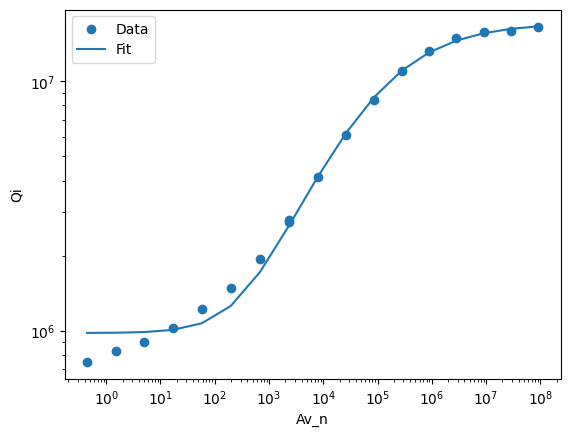

C:\Users\KBrewer\AppData\Local\Temp\ipykernel_24068\2218125329.py:14: RuntimeWarning: overflow encountered in scalar power
  saturation = np.sqrt(1 + ((x ** C) / (D * (t_scalar)** C2)) * tanh_term)


[ 2.40980791e+05 -4.93270063e-03  9.43456524e-01  4.83234546e+00
 -5.65640838e-01]


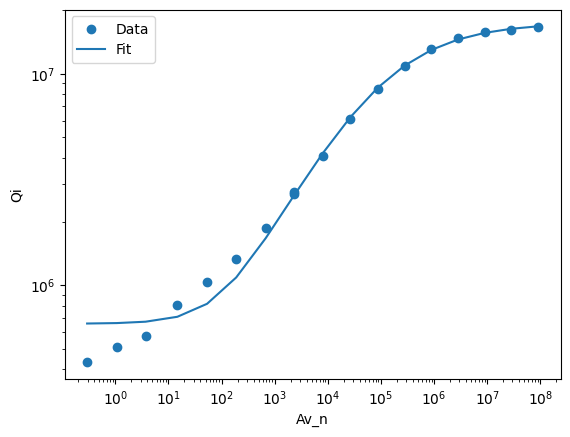

[ 1.85853438e+05 -4.89224728e-03  9.50632845e-01  4.49921182e+00
 -6.60018238e-01]


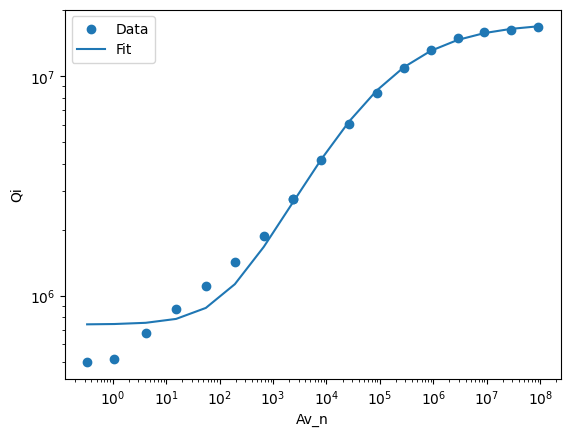

[ 1.46631146e+05 -4.88694853e-03  9.36263508e-01  2.67436851e+00
 -8.22300410e-01]


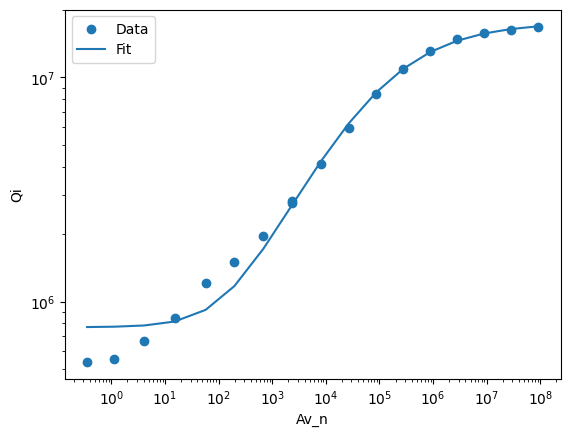

[ 1.35371355e+05 -4.94395170e-03  9.25369891e-01  2.82463391e+00
 -8.52891838e-01]


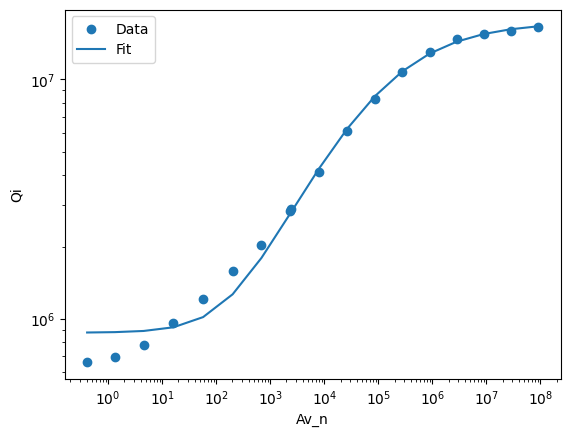

[ 1.21263099e+05 -5.32052984e-03  8.08173887e-01  4.67527478e+00
 -1.14134613e-01]


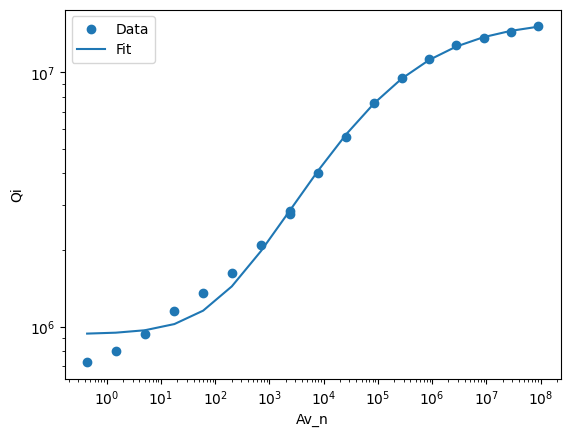

C:\Users\KBrewer\AppData\Local\Temp\ipykernel_24068\1145373779.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(Qi_inverse_prcoessing_curve_fit, (x,t_array,omega_array),y, p0=[5e+05, -5e-03, 1,  1,


[-4.30730216e+05 -1.85443520e-02 -2.43622461e-01  1.10960290e+03
  6.39953415e+02]


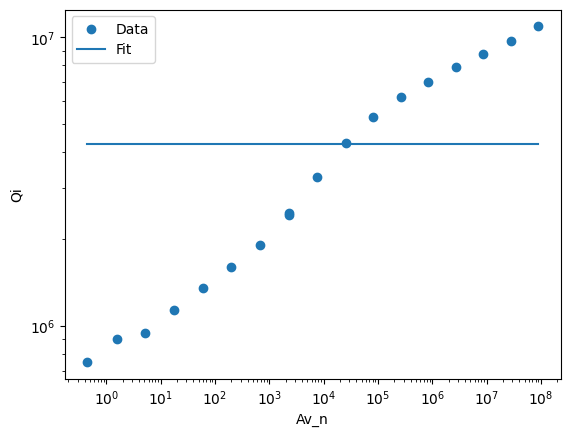

[ 2.80347932e+07  1.37365209e+06  3.98341121e-01 -1.21059109e+03
 -7.50507552e+02]


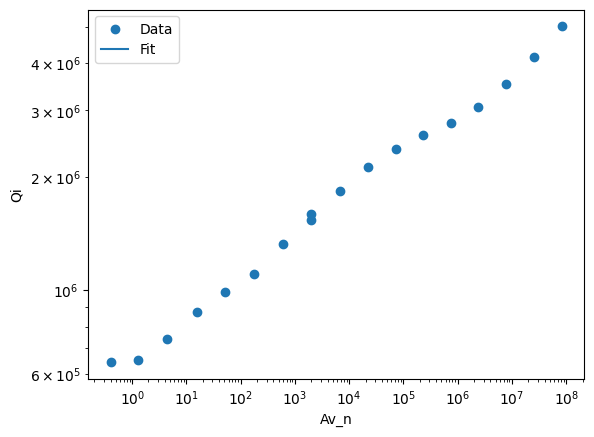

In [98]:
params_list = []
cov_list= []

for i in range(len(data_for_temperature)):
    x= data_for_av_n[i][0]
    y=data_for_Qi_graph[i][0]
    t= data_for_temperature[i]
    #print(t)
    omega= data_for_fr[i][0]
    #print(omega)
    t_array = np.full_like(x, float(t), dtype=float)
    omega_array = np.full_like(x, float(omega), dtype=float)
#print(x, t_array, omega_array)
    popt, pcov = curve_fit(Qi_inverse_prcoessing_curve_fit, (x,t_array,omega_array),y, p0=[5e+05, -5e-03, 1,  1,
 1])
    print(popt)
    A, B, C, D, C2 = popt

    y_fit = Qi_inverse_prcoessing_curve_fit((x,t_array,omega_array), A, B, C, D, C2)
    plt.figure()
    plt.scatter(x, y, label = "Data")
    plt.plot(x, y_fit, label = "Fit")
    plt.xlabel("Av_n")
    plt.ylabel("Qi")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.show()

In [126]:
def Qi_inverse_prcoessing_curve_fit_t_var(vars, A, B):
    t, n_array, omega_array = vars
    t_scalar= np.divide(t, 1000)
    
    T_eff_result = QP_effT_array(t_scalar)
    # tanh terms
    tanh_term = np.tanh(cs.hbar * omega_array / (2 * cs.k * t_scalar))

    # TLS saturation factor
    #beta 1 ~ 1
    #beta 2 ~ 0.5
    saturation = np.sqrt(1 + ((n_array ** 1) / (10 * (t_scalar)** 0.5)) * tanh_term)
    
    # TLS contribution
    TLS_contribution = (1 / A) * (tanh_term / saturation)

    # Quasiparticle loss term
    qp_term = B * (sigma1_ratio(omega_array, T_eff_result, cs.hbar, cs.k) / sigma2_ratio(omega_array, 0.02, cs.hbar, cs.k))

    # Final expression
    Qi_inv =  TLS_contribution - qp_term
    #Qi_inv = TLS_contribution - qp_term

    return 1/Qi_inv

In [60]:
freq_data_cpw = [[30,4.826524073,0.290812],
[50, 4.826524073, 0.291629],
[75, 4.826523825, 0.291612],
[100, 4.826523695, 0.292409],
[125, 4.826523655, 0.292644],
[150, 4.826523601, 0.293924],
[175, 4.826523391, 0.299193],
[200, 4.826522213, 0.317687]]

In [211]:
x= data_for_temperature
omega_array = [row[1] for row in freq_data_cpw]
omega_array = np.multiply(omega_array, 1e9)
n_array = []
y_set = []
for k in range(len(data_for_temperature)):
    n = data_for_av_n[k][0][17]
    y= data_for_Qi_graph[k][0][17]
    n_array.append(float(n))
    y_set.append(float(y))
print(np.mean(n_array))
#print(y_set)
popt, pcov = curve_fit(Qi_inverse_prcoessing_curve_fit_t_var, (x, n_array, omega_array),y_set ,p0=[10**6, 10**-6])
print(popt)
#omega_array

89301259.41336323
[ 4.39646070e+10 -5.65874954e-03]


In [224]:
params_list = []
cov_list= []

for i in range(len(data_for_temperature)):
    x= data_for_av_n[i][1]
    y=data_for_Qi_graph[i][1]
    t= data_for_temperature[i]
    omega= data_for_fr[i][1]
    #print(x, t, omega)
    t_array = np.full_like(x, float(t), dtype=float)
    omega_array = np.full_like(x, float(omega), dtype=float)
    popt, pcov = curve_fit(Qi_inverse_prcoessing_curve_fit, (x,t_array,omega_array),y, p0=[10**6, 10**-6])
    print(popt)

[ 1.69500143e+05 -2.76462723e-02]
[[ 1.16754270e+09 -1.83241425e+01]
 [-1.83241425e+01  1.76902494e-06]]
[ 1.23107448e+05 -2.73514125e-02]
[[ 5.86460146e+08 -1.31486290e+01]
 [-1.31486290e+01  1.79316628e-06]]
[ 1.15385413e+05 -2.74685053e-02]
[[ 4.18639874e+08 -1.01394975e+01]
 [-1.01394975e+01  1.54846611e-06]]
[ 1.03867474e+05 -2.75248209e-02]
[[ 3.16236974e+08 -8.67274854e+00]
 [-8.67274854e+00  1.53185966e-06]]
[ 9.65792162e+04 -2.75993838e-02]
[[ 2.60409057e+08 -7.82019140e+00]
 [-7.82019140e+00  1.54036557e-06]]
[ 9.83408228e+04 -2.83618034e-02]
[[ 2.09875390e+08 -6.41058199e+00]
 [-6.41058199e+00  1.32073074e-06]]
[ 8.52329721e+04 -2.93759806e-02]
[[ 1.22260967e+08 -4.53723287e+00]
 [-4.53723287e+00  1.14646502e-06]]
[ 9.09611834e+04 -3.43808910e-02]
[[ 1.46859863e+08 -6.19445662e+00]
 [-6.19445662e+00  1.70564764e-06]]


## Curve fit for df

### Definitions

In [96]:
def total_frac_df(vars, A, B):
    x, omega_scalar = vars
    
    real_part = psi(1/2 + 1/ (2*np.pi*1j) * (cs.hbar * omega_scalar / (cs.k *x)))
    log_part = (cs.hbar * omega_scalar)/ (2*np.pi * cs.k * x)
    df_TLS_func=  1/ np.pi * (np.real(real_part) - np.log(log_part))

    
    T_eff = QP_effT_array(x)
    delta_sigma_2 = sigma2_ratio(omega_scalar, T_eff, cs.hbar, cs.k)- sigma2_ratio(omega_scalar, 0.018, cs.hbar, cs.k)
    df_QP_func_v2 =1/2 * delta_sigma_2 / sigma2_ratio(omega_scalar, 0.018, cs.hbar, cs.k)
    return 1/ A * df_TLS_func- B* df_QP_func_v2

In [92]:
frac_delta_freq

array([ 0.00000000e+00,  0.00000000e+00, -5.13827335e-08, -7.83172309e-08,
       -8.66047685e-08, -9.77929443e-08, -1.41302517e-07, -3.85370501e-07])

In [243]:
frac_delta_freq_r2

array([ 0.00000000e+00,  2.56428451e-07,  2.15377405e-07,  1.95273640e-07,
        1.74326359e-07,  1.58721338e-07,  1.02768201e-07, -1.17529707e-07])

In [245]:
data_for_temperature

[30, 50, 75, 100, 125, 150, 175, 200]

In [99]:
frac_delta_freq

array([ 0.00000000e+00,  0.00000000e+00, -5.13827335e-08, -7.83172309e-08,
       -8.66047685e-08, -9.77929443e-08, -1.41302517e-07, -3.85370501e-07])

In [101]:
for i in range(len(data_for_temperature)):
    print(data_for_fr[i][0])

4826524072.793374
4826524247.997126
4826523959.280781
4826523653.654736
4826523758.547291
4826523689.549636
4826523545.417166
4826522197.658556


In [106]:
for i in range(len(data_for_temperature)):
    x= data_for_temperature[i]
    x= np.divide(x,1000)
    y=frac_delta_freq
    omega= data_for_fr[i][0]
    popt, pcov = curve_fit(total_frac_df, (x,omega),y, p0=[10**6, 10**-6])
    print(popt, pcov)
   

[ 9.37556918e+06 -1.44153416e-03] [[ 8.11756817e+33 -2.07736929e+22]
 [-2.07736929e+22  5.31620192e+10]]
[ 3.57212911e+06 -1.82483815e-03] [[3.26441874e+29 3.28386682e+19]
 [3.28386682e+19 3.30343075e+09]]
[ 3.11862210e+06 -2.36911275e-03] [[3.23874625e+28 9.43552994e+18]
 [9.43552994e+18 2.74887930e+09]]
[ 1.70834324e+06 -3.80606574e-03] [[4.65062842e+27 6.39333883e+18]
 [6.39333883e+18 8.78908777e+09]]
[ 1.04090914e+06 -6.21484542e-03] [[2.47423650e+41 1.13173541e+33]
 [1.13173541e+33 5.17664760e+24]]
[ 3.84826946e+06 -2.95396291e-03] [[1.51074098e+28 5.84346368e+18]
 [5.84346368e+18 2.26021986e+09]]
[ 1.00203984e+06 -7.19194030e-03] [[inf inf]
 [inf inf]]
[ 1.09239565e+06 -5.58239987e-03] [[2.47423650e+41 1.02850662e+33]
 [1.02850662e+33 4.27536281e+24]]


C:\Users\KBrewer\AppData\Local\Temp\ipykernel_3748\300042649.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(total_frac_df, (x,omega),y, p0=[10**6, 10**-6])


### Plotting Q_TLS 0 from Qi vs df/f

Text(0.5, 1.0, 'Q0_TLS- R7.11GHz ')

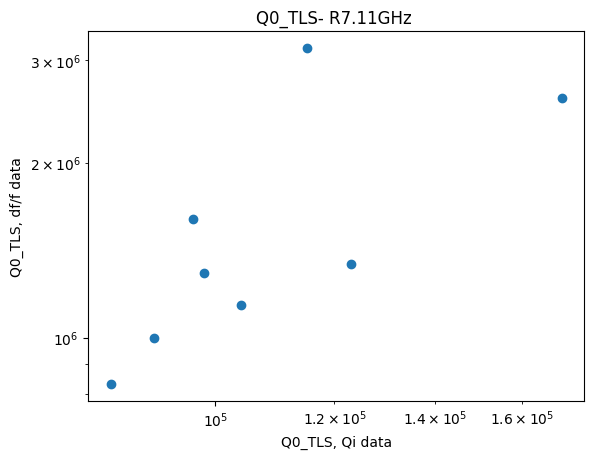

In [120]:
Q0_TLS = [1.70E+05,
1.23E+05,
1.15E+05,
1.04E+05,
9.66E+04,
9.83E+04,
8.52E+04,
9.10E+04]

df_TLS= [2.59E+06,
1.34E+06,
3.15E+06,
1.14E+06,
1.60E+06,
1.29E+06,
8.32E+05,
1.00E+06]

plt.plot(Q0_TLS, df_TLS, 'o')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Q0_TLS, Qi data")
plt.ylabel("Q0_TLS, df/f data")
plt.title("Q0_TLS- R7.11GHz ")

Text(0.5, 1.0, 'Q0_TLS- R4.83GHz ')

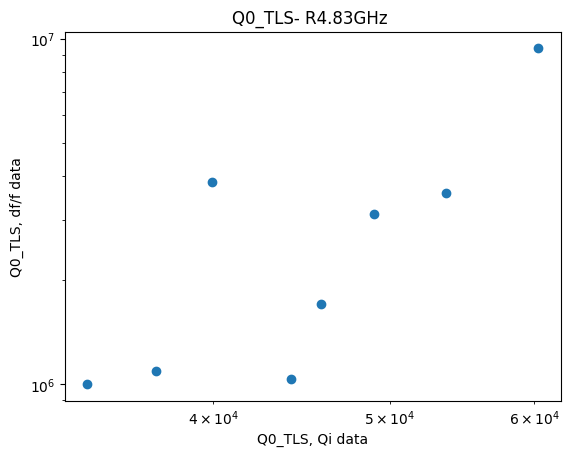

In [121]:
Q0_TLS = [6.03E+04,
5.37E+04,
4.90E+04,
4.58E+04,
4.41E+04,
3.99E+04,
3.41E+04,
3.72E+04]

df_TLS= [9.38E+06,
3.57E+06,
3.12E+06,
1.71E+06,
1.04E+06,
3.85E+06,
1.00E+06,
1.09E+06]

plt.plot(Q0_TLS, df_TLS, 'o')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Q0_TLS, Qi data")
plt.ylabel("Q0_TLS, df/f data")
plt.title("Q0_TLS- R4.83GHz ")

### Merging the two fitting functions

In [276]:
def residuals(p, vars_qi, y_qi, vars_df, y_df):
    A, B = p
    qi_res= Qi_inverse_prcoessing_curve_fit(vars, A, B) - y_qi
    df_res= total_frac_df(vars, A, B) - y_df

    return np.concatenate([qi_res, df_res])
    

In [277]:
frac_delta_freq

array([ 0.00000000e+00,  0.00000000e+00, -5.13827335e-08, -7.83172309e-08,
       -8.66047685e-08, -9.77929443e-08, -1.41302517e-07, -3.85370501e-07])

In [ ]:
from scipy.optimize import least_squares
for i in range(len(data_for_temperature)):
    x_qi = data_for_av_n[i][0]
    y_qi = data_for_Qi_graph[i][0]
    print(x_qi)
    t= data_for_temperature[i]
    omega = data_for_fr[i][0]
    t_array = np.full_like(x, float(t), dtype=float)
    omega_array = np.full_like(x, float(omega), dtype=float)

    t_df= np.divide(x,1000)
    y_df=frac_delta_freq
    vars1= (x_qi, t_array, omega_array)
    vars2= (t_df, omega)
    p0 = [10**6, 10**-3]
    #res = least_squares(residuals, p0, args=(vars1, y_qi, vars2, y_df))

In [287]:
from scipy.optimize import least_squares
x_qi = data_for_av_n[0][0]
y_qi = data_for_Qi_graph[0][0]

t= data_for_temperature
t1= data_for_temperature[0]
omega = data_for_fr[0][0]
t_array = np.full_like(x, float(t1), dtype=float)
omega_array = np.full_like(x, float(omega), dtype=float)

t_df= np.divide(t,1000)
y_df=frac_delta_freq
vars1= (x_qi, t_array, omega_array)
vars2= (t_df, omega)
#print(type(vars2), vars2)
#print(len(vars2))
#print(type(vars2[0]), type(vars2[1]))
#p0 = [10**6, 10**-3]
    #res = least_squares(residuals, p0, args=(vars1, y_qi, vars2, y_df))

<class 'tuple'> (np.float64(0.0002), np.float64(4826524072.793374))
2
<class 'numpy.float64'> <class 'numpy.float64'>
<class 'tuple'> (np.float64(0.0002), np.float64(4826524247.997126))
2
<class 'numpy.float64'> <class 'numpy.float64'>
<class 'tuple'> (np.float64(0.0002), np.float64(4826523959.280781))
2
<class 'numpy.float64'> <class 'numpy.float64'>
<class 'tuple'> (np.float64(0.0002), np.float64(4826523653.654736))
2
<class 'numpy.float64'> <class 'numpy.float64'>
<class 'tuple'> (np.float64(0.0002), np.float64(4826523758.547291))
2
<class 'numpy.float64'> <class 'numpy.float64'>
<class 'tuple'> (np.float64(0.0002), np.float64(4826523689.549636))
2
<class 'numpy.float64'> <class 'numpy.float64'>
<class 'tuple'> (np.float64(0.0002), np.float64(4826523545.417166))
2
<class 'numpy.float64'> <class 'numpy.float64'>
<class 'tuple'> (np.float64(0.0002), np.float64(4826522197.658556))
2
<class 'numpy.float64'> <class 'numpy.float64'>


In [133]:
for i in range(len(data_for_temperature)):
    x= data_for_av_n[i][0]
    y=data_for_Qi_graph[i][0]
    t= data_for_temperature[i]
    omega= data_for_fr[i][0]
    t_array = np.full_like(x, float(t), dtype=float)
    omega_array = np.full_like(x, float(omega), dtype=float)
    popt, pcov = curve_fit(Qi_inverse_prcoessing_curve_fit, (x,t_array,omega_array),y, p0=[10**6, 10**-6])
    print(popt)


for i in range(len(data_for_temperature)):
    x= data_for_temperature[i]
    x= np.divide(x,1000)
    y=frac_delta_freq_r2
    omega= data_for_fr[i][1]
    popt, pcov = curve_fit(total_frac_df, (x,omega),y, p0=[10**6, -3e-3])
    print(popt)

[ 6.0335063e+04 -5.0609592e-03]
[ 5.36666323e+04 -5.03131087e-03]
[ 4.90383396e+04 -4.98189861e-03]
[ 4.58078006e+04 -5.00155521e-03]
[ 4.41248660e+04 -5.08361146e-03]
[ 3.99041525e+04 -5.75809445e-03]
[ 3.40959985e+04 -8.29815733e-03]
[ 3.71829201e+04 -1.74137331e-02]
[-9.68479586e+06  1.66486465e-03]
[-8.20986731e+07  1.75334993e-03]
[1.02509180e+06 4.12862888e-04]
[1.90947518e+06 4.58383579e-04]
[ 1.74273881e+06 -1.89088498e-04]
[ 8.30414156e+05 -3.25130751e-03]
[ 9.20933827e+05 -3.18943677e-03]
[ 8.73260354e+05 -3.14974066e-03]


C:\Users\KBrewer\AppData\Local\Temp\ipykernel_3748\3242389901.py:17: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(total_frac_df, (x,omega),y, p0=[10**6, -3e-3])


In [118]:
for i in range(len(data_for_temperature)):
    x= data_for_temperature[i]
    x= np.divide(x,1000)
    y=frac_delta_freq
    omega= data_for_fr[i][0]
    popt, pcov = curve_fit(total_frac_df, (x,omega),y,p0=[10**6, -2e-03])
    print(popt)

[ 2.58631058e+06 -1.37852920e-03]
[ 1.34124521e+06 -2.42250738e-03]
[ 3.14608938e+06 -2.36122190e-03]
[ 1.13995300e+06 -4.97309884e-03]
[ 1.5957205e+06 -4.5635495e-03]
[ 1.28662577e+06 -5.91754569e-03]
[ 8.31926149e+05 -8.38800563e-03]
[ 1.0000000e+06 -6.0019631e-03]


C:\Users\KBrewer\AppData\Local\Temp\ipykernel_3748\3602542030.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(total_frac_df, (x,omega),y,p0=[10**6, -2e-03])


## Classes 

In [1]:
class MyClass:
    x=5

In [2]:
p1= MyClass()

In [3]:
print(p1.x)

5


In [4]:
del p1

In [9]:
p1= MyClass()
p2= MyClass()
p3= MyClass()
print(p1.x)
print(p2.x)
print(p3.x)

5
5
5


In [10]:
class person:
    pass

In [12]:
p0 = person()
print(p0)

In [15]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age= age

p1= Person("Kt", 24)
print(p1.name)
print(p1.age)

Kt
24


In [19]:
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age

  def greet(self):
    print("Hello, my name is " + self.name)

p1 = Person("Emil", 25)
p1.greet()

Hello, my name is Emil


In [22]:
class Person:
  def __init__(self, name):
    self.name = name

  def printname(self):
    print(self.name)

p2 = Person("Tobias")
p1 = Person("Katie")

p1.printname()
p2.printname()


Katie
Tobias


In [32]:
class Person:
    def __init__(self, name, age):
        self.name= name
        self.age= age
    def greet(self):
        print("hey, my name is " + self.name)
p1= Person("kt", 34)
p1.greet()
p2=Person("pop", 4)
p2.greet()

hey, my name is kt
hey, my name is pop


In [35]:
class Car:
    def __init__(self, brand, model, year):
        self.brand= brand
        self.model = model
        self.year= year

    def display_info(self):
        print(f"{self.year} {self.brand} {self.model}")

car1 = Car("VW", "polo", 2032)
car2= Car("Seat", "ibiza", 1995)
car1.display_info()
car2.display_info()

2032 VW polo
1995 Seat ibiza


In [51]:
class Person:
  def __init__(self, name,age):
    self.name = name
    self.age = age
  def greet(self):
    return "Hello, " + self.name

  def welcome(self):
    message = self.greet()
    print(message + "! Welcome to our website.")

p1 = Person("Tobias", 34)
p1.welcome()
p1.greet()

Hello, Tobias! Welcome to our website.


'Hello, Tobias'

In [52]:
print(p1.name)
#del p1.name

Tobias


In [53]:
print(p1.name)

Tobias


In [60]:
class Person:
  lastname = ""

  def __init__(self, name):
    self.name = name

p1 = Person("Linus")
p2 = Person("Emil")

print(p1.lastname)
print(p2.lastname)
#print(p3.lastname)

In [61]:
Person.lastname = "brewer"

p4= Person("KB")
print(p4.lastname)
print(p1.lastname)
print(p2.lastname)

brewer
brewer
brewer


In [63]:
class Person:
  def __init__(self, name):
    self.name = name

p2 = Person("Tobias")

p2.age = 25
p1.city = "Oslo"

print(p2.name)
print(p2.age)
print(p2.city)

Tobias
25


AttributeError: 'Person' object has no attribute 'city'

In [64]:
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age

p1 = Person("Emil", 36)
print(p1)

In [65]:
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age

  def __str__(self):
    return f"{self.name} ({self.age})"

p1 = Person("Tobias", 36)
print(p1)

Tobias (36)


In [66]:
class Playlist:
    def __init__(self, name):
        self.name = name
        self.songs= []
        
    def add_song(self, song):
        self.songs.append(song)
        print(f"Added: {song}")

    def remove_song(self, song):
        if song in self.songs:
            self.songs.remove(song)
            print(f"Removed: {song}")

    def show_songs(self):
        print(f"Playlist '{self.name}':")
        for song in self.songs:
            print(f"- {song}")

In [82]:
gb_songs = Playlist("Good")
g = ["song1", "song2", "song3"]
for k in g:
    gb_songs.add_song(k)

Added: song1
Added: song2
Added: song3


In [83]:
gb_songs.remove_song("song2")

Removed: song2


In [86]:
gb_songs.show_songs()

Playlist 'Good':
- song1
- song3


In [87]:
Playlist.__dict__

mappingproxy({'__module__': '__main__',
              '__init__': <function __main__.Playlist.__init__(self, name)>,
              'add_song': <function __main__.Playlist.add_song(self, song)>,
              'remove_song': <function __main__.Playlist.remove_song(self, song)>,
              'show_songs': <function __main__.Playlist.show_songs(self)>,
              '__dict__': <attribute '__dict__' of 'Playlist' objects>,
              '__weakref__': <attribute '__weakref__' of 'Playlist' objects>,
              '__doc__': None})

In [89]:
del Playlist.remove_song

In [90]:
gb_songs.remove_songs("song1")

AttributeError: 'Playlist' object has no attribute 'remove_songs'

In [95]:
class Person:
  def __init__(self, fname, lname):
    self.firstname = fname
    self.lastname = lname

  def printname(self):
    print(self.firstname, self.lastname)

#Use the Person class to create an object, and then execute the printname method:

x = Person("John", "Doe")
x.printname()

John Doe


In [96]:
class Student(Person):
    pass

In [97]:
Student.__dict__

mappingproxy({'__module__': '__main__', '__doc__': None})

In [98]:
x = Student("Mike", "Olsen")
x.printname()

Mike Olsen


In [99]:
Person.__dict__

mappingproxy({'__module__': '__main__',
              '__init__': <function __main__.Person.__init__(self, fname, lname)>,
              'printname': <function __main__.Person.printname(self)>,
              '__dict__': <attribute '__dict__' of 'Person' objects>,
              '__weakref__': <attribute '__weakref__' of 'Person' objects>,
              '__doc__': None})

In [100]:
Student.__mro__

(__main__.Student, __main__.Person, object)

In [104]:
Person.__getattribute__

<slot wrapper '__getattribute__' of 'object' objects>

In [115]:
class Person:
    def __init__(self, fname, lname):
        self.firstname = fname
        self.lastname = lname

    def printname(self):
        print(self.firstname, self.lastname)
    

In [145]:
class Student(Person):
#child init overrides the parents init 
    def __init__(self, fname, lname, year):
        #special code which makes the child inherit 
        #all the methods and properties from its parent
        super().__init__(fname, lname)
        self.graduationyear = year
    def welcome(self):
        print("Welcome", self.firstname, self.lastname,
              "to the class of" ,self.graduationyear)

In [150]:
x = Student("Katie", "Brewer", 2019)

In [125]:
x.nickname

'Kat'

In [148]:
x.firstname

'Katie'

In [152]:
x.welcome()

Welcome Katie Brewer to the class of 2019


In [157]:
class Vehicle:
    def __init__(self, brand, model):
        self.brand = brand
        self.model = model

    def move(self):
        print("Drive!")
class Car(Vehicle):
    pass
    
class Boat(Vehicle):
    def move(self):
        print("Sail!")

class Plane(Vehicle):
    def move(self):
        print("Fly!")

        

In [160]:
car1 = Car("Ford", "Mustang")
boat1 = Boat("IbizA", "Touring 20" )
plane1 = Plane("Boeing", "727" )

for x in (car1, boat1, plane1):
    #x.move()
    x.brand